<a href="https://colab.research.google.com/github/suyeee/Visualization-Project/blob/master/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%86%8C%EB%B9%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EC%97%85%EC%A2%85%EB%B3%84%EB%A1%9C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석 목표
+ 목표: 거리두기 on VS 거리두기 off 비교
  - 거리두기 on 기간: 2020-02-29~2022-04-17
  - 거리두기 off 기간: 2019-01~ 2020-02-28 & 2022-04-18 ~
  + 큰 업종별로 보고 자잘한걸 비교
        1. 큰 카테고리 약 10개로 비교해서 보고
        2. ex) 식료품을 더 세분화해서 분류하면 일반식료품, 건강보조식품 이렇게 2가지로 나눠지는데 둘의 소비율은 어떤지 보기
            - 만약 일반식료품에서 소비한 돈이 건강보조식품보다 많은것으로 결과가 나왔다면 특히 어떤 지역(강원, 서울 등등)에서 소비를 많이하는지?
            - 관련기사도 찾아보고, 코로나 확진 환자의 비중이 높은 지역은 의료관련이나 건강보조식품 관련 소비가 늘었을테니?

+ plot 형태 
  + lineplot
        - 가로축: 시간대(날짜), 세로축: 소비된 돈
  + 파이차트
        1. 큰업종으로 분류 후 상위 5개정도만 따로, 하위애들은 한번에 묶어서 기타(파이의 칸 수는 약 6개 정도?)  X 2개 (왼쪽에 거리두기 on 파이, 오른쪽에 거리두기 off 파이 이런식으로 배치) 
        2. 거리두기 off 에는 어떤 업종들의 소비가 활발했는데 , on 되고나니 어떤 업종의 소비가 늘었는지 등등

**한글깨짐 방지 코드**

In [ ]:
# #시각화 초기셋팅
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina' #그래프 화질 높이기

# 1. 데이터 불러오기

In [ ]:
CREDIT_FILE = '/content/1신용카드 지역별_월간일평균_데이터(만원단위).csv'

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(CREDIT_FILE, thousands=",",  encoding='euc-kr')
df.head()

,통계표,항목명1,항목명2,항목명3,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,5.8.2 지역별 소비유형별 개인 신용카드,서울,합계,월간 일평균,만원,원자료,69240259.0,64613174.0,66446113.0,68952576.0,...,85907226.0,86030337.0,87899797.0,90345940.0,83655395.0,88086573.0,88401437.0,93251430.0,92461453.0,94378602.0
1,5.8.2 지역별 소비유형별 개인 신용카드,서울,백화점,월간 일평균,만원,원자료,1558884.0,1533836.0,1649840.0,1647569.0,...,1803957.0,1931174.0,1775351.0,1495184.0,1540847.0,1766069.0,1993851.0,2120547.0,2034954.0,1948790.0
2,5.8.2 지역별 소비유형별 개인 신용카드,서울,대형마트/유통전문점,월간 일평균,만원,원자료,2000189.0,1906961.0,1958531.0,1974282.0,...,1785718.0,1872759.0,1801518.0,1819156.0,1831319.0,1896515.0,1798696.0,1907008.0,1813231.0,1930281.0
3,5.8.2 지역별 소비유형별 개인 신용카드,서울,슈퍼마켓,월간 일평균,만원,원자료,1454884.0,1395466.0,1428419.0,1454497.0,...,1313956.0,1326416.0,1354326.0,1398310.0,1403236.0,1440681.0,1328119.0,1435294.0,1353245.0,1407304.0
4,5.8.2 지역별 소비유형별 개인 신용카드,서울,편의점,월간 일평균,만원,원자료,572632.0,553451.0,594938.0,631253.0,...,682861.0,690451.0,745681.0,729352.0,727883.0,738471.0,715022.0,729369.0,706559.0,682613.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   통계표      547 non-null    object 
 1   항목명1     544 non-null    object 
 2   항목명2     544 non-null    object 
 3   항목명3     544 non-null    object 
 4   단위       544 non-null    object 
 5   변환       544 non-null    object 
 6   2019/01  544 non-null    float64
 7   2019/02  544 non-null    float64
 8   2019/03  544 non-null    float64
 9   2019/04  544 non-null    float64
 10  2019/05  544 non-null    float64
 11  2019/06  544 non-null    float64
 12  2019/07  544 non-null    float64
 13  2019/08  544 non-null    float64
 14  2019/09  544 non-null    float64
 15  2019/10  544 non-null    float64
 16  2019/11  544 non-null    float64
 17  2019/12  544 non-null    float64
 18  2020/01  544 non-null    float64
 19  2020/02  544 non-null    float64
 20  2020/03  544 non-null    float64
 21  2020/04  544 non

# 2. 데이터 다듬기

In [ ]:
# 필요없는 컬럼 삭제
del df['통계표']
del df['단위']
del df['항목명3']
del df['변환']
df.head()

,항목명1,항목명2,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,합계,69240259.0,64613174.0,66446113.0,68952576.0,70776142.0,70235581.0,74374187.0,69873914.0,...,85907226.0,86030337.0,87899797.0,90345940.0,83655395.0,88086573.0,88401437.0,93251430.0,92461453.0,94378602.0
1,서울,백화점,1558884.0,1533836.0,1649840.0,1647569.0,1721394.0,1579826.0,1585981.0,1512464.0,...,1803957.0,1931174.0,1775351.0,1495184.0,1540847.0,1766069.0,1993851.0,2120547.0,2034954.0,1948790.0
2,서울,대형마트/유통전문점,2000189.0,1906961.0,1958531.0,1974282.0,2013845.0,1935752.0,1945017.0,1909669.0,...,1785718.0,1872759.0,1801518.0,1819156.0,1831319.0,1896515.0,1798696.0,1907008.0,1813231.0,1930281.0
3,서울,슈퍼마켓,1454884.0,1395466.0,1428419.0,1454497.0,1488383.0,1480148.0,1445230.0,1470339.0,...,1313956.0,1326416.0,1354326.0,1398310.0,1403236.0,1440681.0,1328119.0,1435294.0,1353245.0,1407304.0
4,서울,편의점,572632.0,553451.0,594938.0,631253.0,667636.0,704104.0,703053.0,683550.0,...,682861.0,690451.0,745681.0,729352.0,727883.0,738471.0,715022.0,729369.0,706559.0,682613.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목명1     544 non-null    object 
 1   항목명2     544 non-null    object 
 2   2019/01  544 non-null    float64
 3   2019/02  544 non-null    float64
 4   2019/03  544 non-null    float64
 5   2019/04  544 non-null    float64
 6   2019/05  544 non-null    float64
 7   2019/06  544 non-null    float64
 8   2019/07  544 non-null    float64
 9   2019/08  544 non-null    float64
 10  2019/09  544 non-null    float64
 11  2019/10  544 non-null    float64
 12  2019/11  544 non-null    float64
 13  2019/12  544 non-null    float64
 14  2020/01  544 non-null    float64
 15  2020/02  544 non-null    float64
 16  2020/03  544 non-null    float64
 17  2020/04  544 non-null    float64
 18  2020/05  544 non-null    float64
 19  2020/06  544 non-null    float64
 20  2020/07  544 non-null    float64
 21  2020/08  544 non

In [ ]:
# null 값 위치 확인
df.isnull()

,항목명1,항목명2,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
544,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
545,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# 결측값 있는 행 3개 제거
df = df.dropna()
df.tail()

,항목명1,항목명2,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
539,기타,숙박,6488.0,5943.0,5224.0,4914.0,5525.0,4728.0,4910.0,7102.0,...,3356.0,3236.0,3292.0,3686.0,4001.0,2875.0,3328.0,3625.0,3665.0,4146.0
540,기타,음식점,131180.0,123180.0,124984.0,126522.0,126674.0,121896.0,121963.0,122893.0,...,68517.0,71235.0,70230.0,63813.0,62638.0,58552.0,63466.0,69832.0,62453.0,61268.0
541,기타,공과금/개인 및 전문 서비스,54544.0,44230.0,42580.0,42477.0,56500.0,40356.0,52569.0,40992.0,...,31107.0,29765.0,30576.0,43465.0,32606.0,42111.0,34147.0,25368.0,28944.0,40248.0
542,기타,금융/보험,45429.0,45104.0,48643.0,43804.0,45986.0,44635.0,43805.0,44014.0,...,38813.0,36880.0,38015.0,38971.0,34244.0,36710.0,33637.0,31158.0,35043.0,31315.0
543,기타,기타,56422.0,49035.0,50971.0,53289.0,52551.0,52233.0,54935.0,49361.0,...,39759.0,36986.0,37908.0,42478.0,32917.0,36682.0,31619.0,33358.0,32078.0,37303.0


In [ ]:
# 컬럼명 변경
df = df.rename(
    columns={
        '항목명1' : '지역',
        '항목명2' : '업종명'
    }
)
df.head()

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,합계,69240259.0,64613174.0,66446113.0,68952576.0,70776142.0,70235581.0,74374187.0,69873914.0,...,85907226.0,86030337.0,87899797.0,90345940.0,83655395.0,88086573.0,88401437.0,93251430.0,92461453.0,94378602.0
1,서울,백화점,1558884.0,1533836.0,1649840.0,1647569.0,1721394.0,1579826.0,1585981.0,1512464.0,...,1803957.0,1931174.0,1775351.0,1495184.0,1540847.0,1766069.0,1993851.0,2120547.0,2034954.0,1948790.0
2,서울,대형마트/유통전문점,2000189.0,1906961.0,1958531.0,1974282.0,2013845.0,1935752.0,1945017.0,1909669.0,...,1785718.0,1872759.0,1801518.0,1819156.0,1831319.0,1896515.0,1798696.0,1907008.0,1813231.0,1930281.0
3,서울,슈퍼마켓,1454884.0,1395466.0,1428419.0,1454497.0,1488383.0,1480148.0,1445230.0,1470339.0,...,1313956.0,1326416.0,1354326.0,1398310.0,1403236.0,1440681.0,1328119.0,1435294.0,1353245.0,1407304.0
4,서울,편의점,572632.0,553451.0,594938.0,631253.0,667636.0,704104.0,703053.0,683550.0,...,682861.0,690451.0,745681.0,729352.0,727883.0,738471.0,715022.0,729369.0,706559.0,682613.0


In [ ]:
# 타입캐스팅 : 숫자데이터 float -> int 로 변경
df.iloc[:,2:39] = df.iloc[:, 2:39].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역       544 non-null    object
 1   업종명      544 non-null    object
 2   2019/01  544 non-null    int64 
 3   2019/02  544 non-null    int64 
 4   2019/03  544 non-null    int64 
 5   2019/04  544 non-null    int64 
 6   2019/05  544 non-null    int64 
 7   2019/06  544 non-null    int64 
 8   2019/07  544 non-null    int64 
 9   2019/08  544 non-null    int64 
 10  2019/09  544 non-null    int64 
 11  2019/10  544 non-null    int64 
 12  2019/11  544 non-null    int64 
 13  2019/12  544 non-null    int64 
 14  2020/01  544 non-null    int64 
 15  2020/02  544 non-null    int64 
 16  2020/03  544 non-null    int64 
 17  2020/04  544 non-null    int64 
 18  2020/05  544 non-null    int64 
 19  2020/06  544 non-null    int64 
 20  2020/07  544 non-null    int64 
 21  2020/08  544 non-null    int64 
 22  20

In [ ]:
# 데이터 프레임 복사
credit_df = df.copy()

In [ ]:
# 거리두기 on 과 거리두기 off 로 데이터 나눠서 각각 저장
# 거리두기 on 기간: 2020-02-29~2022-04-17 -> 2020.03 부터 2022.01 
# 거리두기 off 기간: 2019-01~ 2020-02-28 & 2022-04-18 ~ -> 2019.01 부터 2020.02 

on1_df = credit_df.iloc[:,16:]
on2_df = credit_df['지역']
on3_df = credit_df['업종명']
on_df = pd.concat([on2_df, on3_df], axis=1)
on_df = pd.concat([on_df, on1_df], axis=1)
on_df.head()

,지역,업종명,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,합계,70782833,74341955,74765477,78518163,81345491,75733737,81781146,78866042,...,85907226,86030337,87899797,90345940,83655395,88086573,88401437,93251430,92461453,94378602
1,서울,백화점,1058273,1343608,1627132,1683456,1510662,1441162,1573249,1725627,...,1803957,1931174,1775351,1495184,1540847,1766069,1993851,2120547,2034954,1948790
2,서울,대형마트/유통전문점,1772047,1781719,1864915,1889399,1759297,1861990,2046200,1818193,...,1785718,1872759,1801518,1819156,1831319,1896515,1798696,1907008,1813231,1930281
3,서울,슈퍼마켓,1405922,1333959,1297407,1304943,1255718,1355903,1482786,1251783,...,1313956,1326416,1354326,1398310,1403236,1440681,1328119,1435294,1353245,1407304
4,서울,편의점,609677,610761,624592,690875,685779,671512,693441,648676,...,682861,690451,745681,729352,727883,738471,715022,729369,706559,682613


In [ ]:
# 거리두기 off 데이터프레임
off1_df = credit_df.iloc[:,2:16]
off2_df = credit_df['지역']
off3_df = credit_df['업종명']
off_df = pd.concat([off2_df,off3_df], axis=1)
off_df = pd.concat([off_df, off1_df], axis=1)
off_df.head()

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02
0,서울,합계,69240259,64613174,66446113,68952576,70776142,70235581,74374187,69873914,72208669,74610214,78260709,78841479,78072706,73908337
1,서울,백화점,1558884,1533836,1649840,1647569,1721394,1579826,1585981,1512464,1685105,1726747,1886881,2004067,1564778,1210120
2,서울,대형마트/유통전문점,2000189,1906961,1958531,1974282,2013845,1935752,1945017,1909669,2051067,1895793,1999642,1968427,2013118,1731363
3,서울,슈퍼마켓,1454884,1395466,1428419,1454497,1488383,1480148,1445230,1470339,1452265,1249681,1339662,1263432,1307334,1352630
4,서울,편의점,572632,553451,594938,631253,667636,704104,703053,683550,689848,684628,653567,647085,605541,623836


In [ ]:
# credit_df_cohort = credit_df.copy()
# credit_df_cohort=credit_df_cohort.set_index(['지역','업종명'])
# credit_df_cohort.iloc[0:5]

# 3. 분석 및 시각화

## 분석1 : 월 별 매출 변화율 분석 (거리두기 on + off 전부 합쳐서)

In [ ]:
# 업종별 합계만 집계
mask = credit_df['업종명'] =='합계'
df1 = credit_df[mask]
df1

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,합계,69240259,64613174,66446113,68952576,70776142,70235581,74374187,69873914,...,85907226,86030337,87899797,90345940,83655395,88086573,88401437,93251430,92461453,94378602
32,부산,합계,6049065,5927276,5998038,5912058,6178744,6075228,6068489,6183496,...,5804239,5958408,6081920,5942905,5558794,5967173,6247080,6393620,6045493,6195807
64,대구,합계,3717256,3706111,3762052,3769256,3906083,3773283,3728432,3759413,...,3732037,3787424,3666347,3649878,3532213,3785698,3928754,4129446,4068342,3992476
96,인천,합계,4434194,4334978,4494753,4470534,4574945,4359091,4100096,4121832,...,3825227,3916362,3938287,3823602,3781562,3991896,4121353,4165274,3837130,3773853
128,광주,합계,2649227,2634058,2764129,2701945,2761407,2678335,2761171,2905880,...,2680427,2611206,2684373,2730044,2684998,2783734,2834117,3099080,2975730,2839103
160,대전,합계,3056319,2957001,3013333,2950770,3040680,2979207,2937842,3053176,...,2548035,2538788,2538277,2450766,2423081,2706518,2791781,2773758,2742418,2747645
192,울산,합계,1572962,1522663,1564377,1561746,1638911,1597721,1609299,1610662,...,1455960,1465527,1533267,1571429,1494984,1529714,1620228,1671060,1606759,1518525
224,경기,합계,31571272,30954580,32551975,31698165,30976800,29681749,29760581,29336922,...,33786197,34517460,34509380,34416655,33869886,35452866,36703607,37584147,36092866,35770778
256,강원,합계,2396108,2325113,2288922,2284136,2539390,2512889,2580535,3003031,...,2471185,2644708,2693391,2801501,2969336,2705124,2861890,2810331,2565063,2664960
288,충북,합계,2111608,2116030,2230967,2270507,2399835,2343948,2271990,2384398,...,2306275,2379128,2393978,2413669,2343535,2392460,2498916,2583541,2325913,2279390


#### 데이터 정제 방법 1번 (간단한 방법)

In [ ]:
df1.iloc[:,2:].sum().index[:]

Index(['2019/01', '2019/02', '2019/03', '2019/04', '2019/05', '2019/06',
       '2019/07', '2019/08', '2019/09', '2019/10', '2019/11', '2019/12',
       '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09', '2021/10', '2021/11', '2021/12',
       '2022/01'],
      dtype='object')

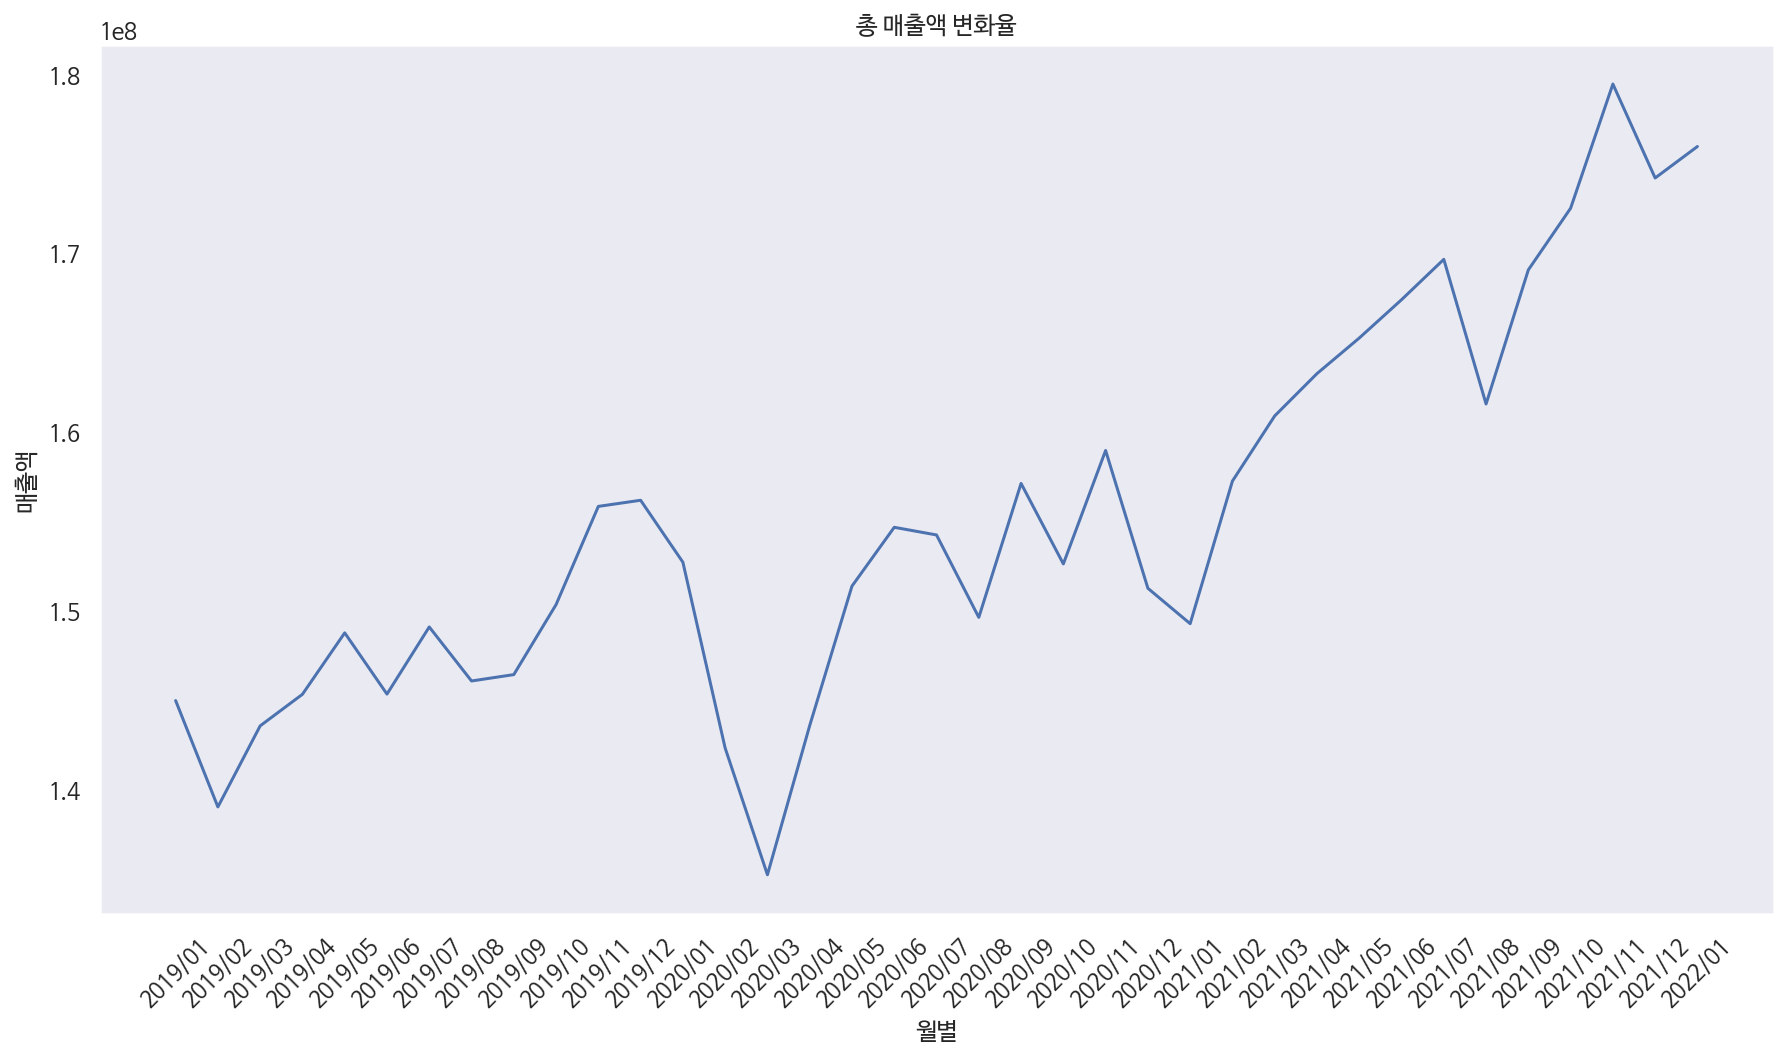

In [ ]:
# 시각화 - plot : lineplot     
plt.rc('font', family='NanumBarunGothic') #위에 초기세팅할때 집어넣었는데도 시각화 할때마다 안치면 한글깨짐...

plt.figure(figsize=(15,8))
plt.plot(df1.iloc[:,2:].sum().index[:],df1.iloc[:,2:].sum())

plt.xlabel('월별')
plt.ylabel('매출액')
plt.title('총 매출액 변화율')

plt.xticks(rotation=45)

plt.grid()
plt.show()

### 데이터 정제 방법 2번(for문 이용)

In [ ]:
# 테스트 - 2019/01 의 전국 소비량 합계
df1['2019/01'].sum()

144955073

In [ ]:
for i in df1.columns[2:]:
  t = df1.loc[:,i].sum()
  print(t)
 

144955073
139006312
143538310
145304111
148739569
145315149
149069740
146048559
146404890
150319666
155810305
156153444
152688838
142296865
135213776
143554038
151353147
154641223
154213378
149603973
157094464
152594192
158935840
151231481
149252506
157226566
160869288
163234932
165224394
167366371
169623489
161535693
169034897
172482634
179424593
174172606
175933845


In [ ]:
month_data=[]
sum_data=[]

for i in df1.iloc[:,2:]:
  month_data.append(i)
  sum_data.append(df1[i].sum())
  #print(i) 
sum_data

[144955073,
 139006312,
 143538310,
 145304111,
 148739569,
 145315149,
 149069740,
 146048559,
 146404890,
 150319666,
 155810305,
 156153444,
 152688838,
 142296865,
 135213776,
 143554038,
 151353147,
 154641223,
 154213378,
 149603973,
 157094464,
 152594192,
 158935840,
 151231481,
 149252506,
 157226566,
 160869288,
 163234932,
 165224394,
 167366371,
 169623489,
 161535693,
 169034897,
 172482634,
 179424593,
 174172606,
 175933845]

In [ ]:
# 2019/01~ 2022/01 까지 월 갯수는 37개니까 len(sum_data) 가 37 로 나오면됨.
len(sum_data)

37

In [ ]:
# 시각화를 하기위해 데이터프레임에 담아준다
df1_month = pd.DataFrame(month_data,columns = ['월별'])
df1_sum = pd.DataFrame(sum_data, columns = ['전국총합계'])

sumall_df = pd.concat([df1_month, df1_sum], axis=1)
sumall_df

,월별,전국총합계
0,2019/01,144955073
1,2019/02,139006312
2,2019/03,143538310
3,2019/04,145304111
4,2019/05,148739569
5,2019/06,145315149
6,2019/07,149069740
7,2019/08,146048559
8,2019/09,146404890
9,2019/10,150319666


### 시각화

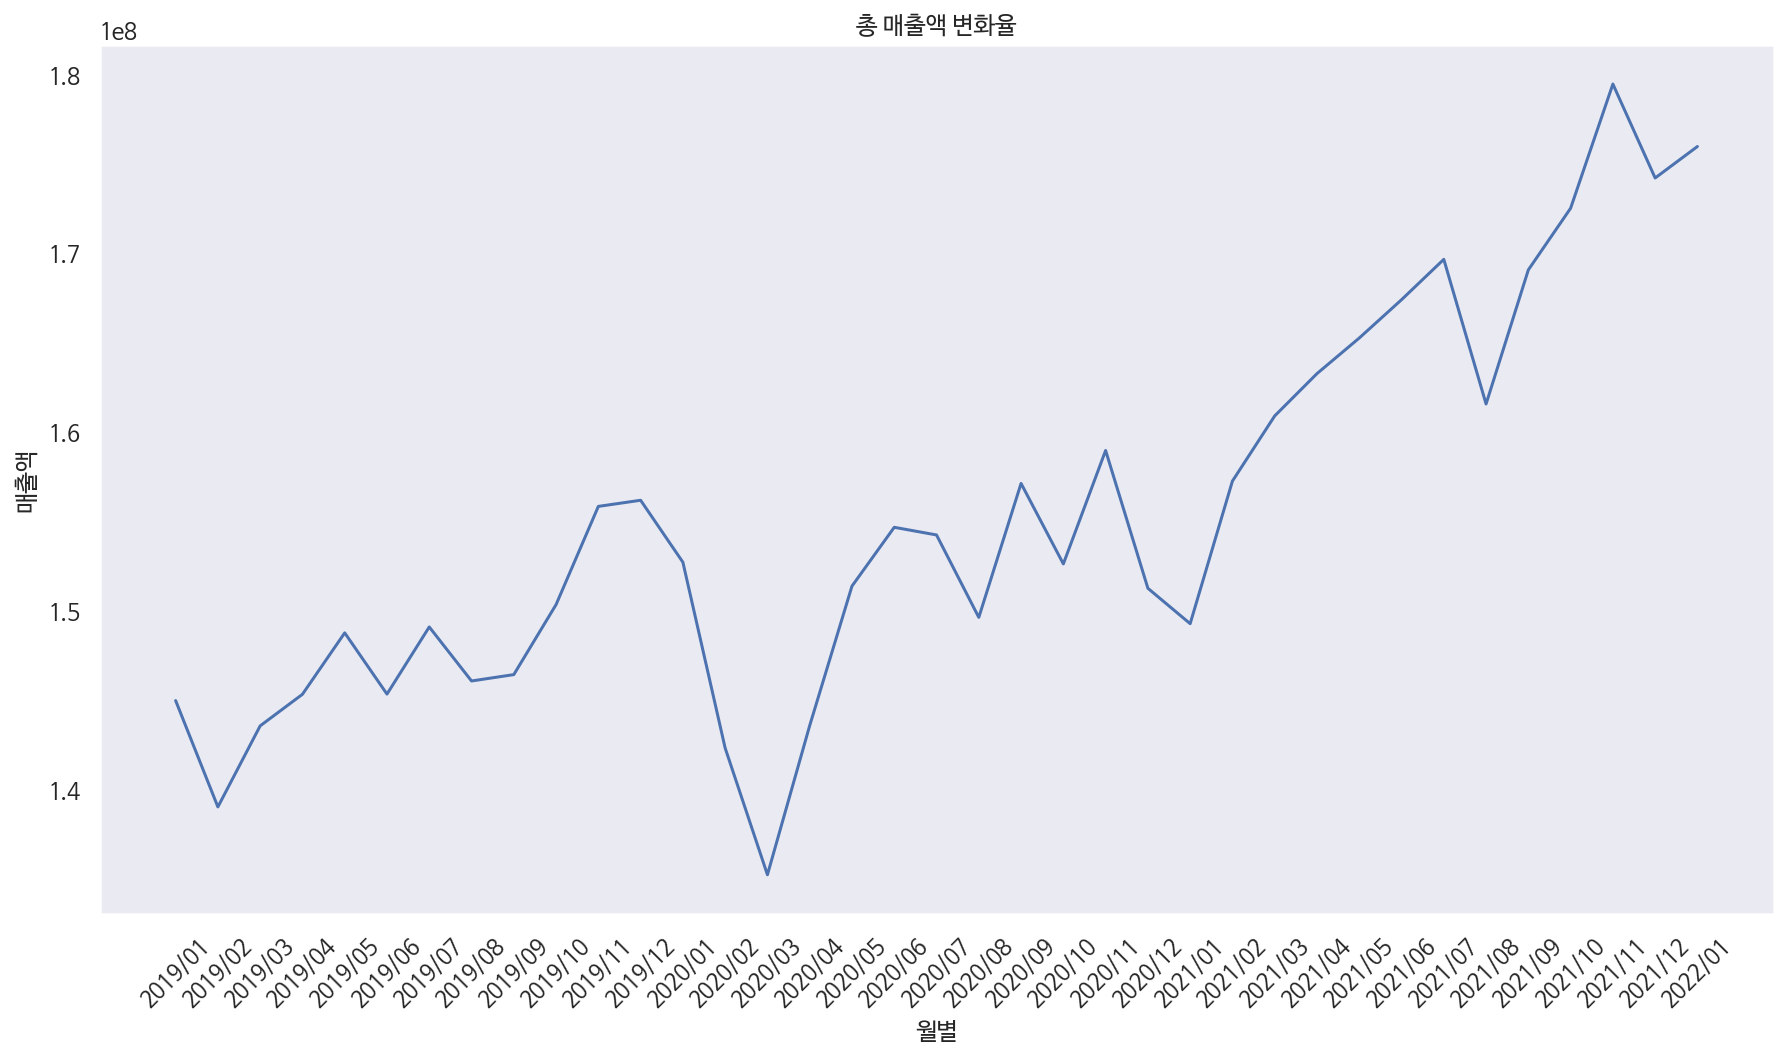

In [ ]:
# 시각화 - plot : lineplot     
plt.rc('font', family='NanumBarunGothic') #위에 초기세팅할때 집어넣었는데도 시각화 할때마다 안치면 한글깨짐...

plt.figure(figsize=(15,8))
plt.plot(sumall_df['월별'],sumall_df['전국총합계'])

plt.xlabel('월별')
plt.ylabel('매출액')
plt.title('총 매출액 변화율')

plt.xticks(rotation=45)

plt.grid()
plt.show()

- 거리두기 첫 시행기간(2020-02-29~)에 전국적으로 매출액이 대폭 하락했음. 

- 카드 매출액이 시간이 갈수록 높아지고 있다
  - 점점 온라인 배달주문 시스템이 확장됨에 따라 집에서도 편하게 무엇이든 주문이 가능해졌다. ex) 거리두기 시행의 여파로 손님확보를 위해 전통시장에서도 배달서비스를 시작했음.
  - 직접 매장을 방문하여 오프라인(ex.시장)에서 현금을 많이 사용하던 사람도 거리두기로 인해 집에서 온라인쇼핑이나 앱으로 물건이나 음식을 주문후 배달받는 경우가 많아짐에 따라 현금보다 카드 사용률이 증가했을것으로 생각됨.

- ❗**2021-07 ~ 2021-08 기간에 소비율 하락을 보이는 이유**
  - 백신 미접종자의 5인 이상 집합금지 시행 (2021.7.19~10.31)으로 인해 모임을 가지기 힘들어서? 
    - **자료 좀더 찾아봐야겟음.**:

- 제일 peak 를 찍은 2021-10 ~ 2021-11 월은 상생소비지원금 시행기간이였다. 그에따른 소비자들의 카드사용액 증가로 보여짐.
  - 상생소비지원금 
        지역경제 활성화와 소비회복 촉진을 위해 신용 또는 체크카드를 2분기 월평균 사용액보다 3% 많이 쓰면,
        3%를 넘는 증가분의 10%를 1인당 월 10만원까지 현금성 충전금으로 환급해 주는 사업


## 분석2: 큰 업종별로 나눠서 소비 변화율 확인
    업종분류
    1.종합소매(5)
      : 백화점, 대형마트/ 유통전문점, 슈퍼마켓, 편의점, 면세점
    2.전자상거래/ 통신판매
    3.식료품(2)
      : 일반식료품, 건강보조식품
    4.의류/잡화(4)
      : 의복/직물, 복식잡화, 시계/귀금속/안경, 화장품
    5.연료
    6.가구/ 가전(2)
     : 가구, 가전제품/정보통신기기
    7.의료/보건(2)
      : 종합병원, 일반병의원/기타의료기관
    8.자동차(3)
      : 국산자동차신품, 기타운송수단, 자동차부품 및 정비
    9.여행/교통(3)
      : 여행사/자동차임대, 항공사, 대중교통
    10.오락/문화(2)
      : 스포츠/오락/여가, 서적/문구
    11.교육
    12.숙박/음식(2)
      : 숙박, 음식점
    13.공과금/개인 및 전문 서비스
    14.금융/보험
    15.기타

In [ ]:
# 업종명에서 합계소비는 빼고 확인 (서울의 경우 0번 행에 합계가 있었음)
mask = credit_df['업종명'] != '합계'
df2 = credit_df[mask]
df2.head(3) 

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
1,서울,백화점,1558884,1533836,1649840,1647569,1721394,1579826,1585981,1512464,...,1803957,1931174,1775351,1495184,1540847,1766069,1993851,2120547,2034954,1948790
2,서울,대형마트/유통전문점,2000189,1906961,1958531,1974282,2013845,1935752,1945017,1909669,...,1785718,1872759,1801518,1819156,1831319,1896515,1798696,1907008,1813231,1930281
3,서울,슈퍼마켓,1454884,1395466,1428419,1454497,1488383,1480148,1445230,1470339,...,1313956,1326416,1354326,1398310,1403236,1440681,1328119,1435294,1353245,1407304


In [ ]:
# 세분화된 업종 하나로 합치기
df2 = df2.groupby('업종명').sum()

df2_1 = pd.Series(df2.iloc[[6,7,8,12,-9]].sum(), name='종합소매')
df2_2 = pd.Series(df2.iloc[-1])
df2_3 = pd.Series(df2.iloc[[2,-12]].sum(), name='식료품')
df2_4 = pd.Series(df2.iloc[[9,14,17,-7]].sum(), name='의류/잡화')
df2_5 = pd.Series(df2.iloc[-2])
df2_6 = pd.Series(df2.iloc[:2].sum(), name='가구/가전')
df2_7 = pd.Series(df2.iloc[[-10,-13]].sum(), name='의료/보건')
df2_8 = pd.Series(df2.iloc[[3,4,-11]].sum(), name='자동차')
df2_9 = pd.Series(df2.iloc[[5,15,-8]].sum(), name='여행/교통')
df2_10 = pd.Series(df2.iloc[[10,13]].sum(), name='오락/문화')
df2_11 = pd.Series(df2.iloc[-5])
df2_12 = pd.Series(df2.iloc[[11,-15]].sum(), name='숙박/음식')
df2_13 = pd.Series(df2.iloc[-6])
df2_14 = pd.Series(df2.iloc[-4])
df2_15 = pd.Series(df2.iloc[-3])

# 시리즈 병합
df2_sum = pd.merge(df2_1,df2_2,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_3 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_4 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_5 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_6 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_7 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_8 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_9 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_10 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_11 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_12 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_13 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_14 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_15 ,left_index = True, right_index = True)
df2_sum


,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,공과금/개인 및 전문 서비스,금융/보험,기타
2019/01,21670385,24501405,2705516,3654523,8087264,4073814,11721910,7082908,4023103,3840357,3672663,16577624,17150880,5592515,10600198
2019/02,21593609,23824709,2780657,3577247,7916788,4156798,10951771,6987653,3742783,3935531,3837840,15984464,13514761,5733950,10467748
2019/03,21606168,24973727,2268401,4005744,8144693,4613805,11248452,8307113,3582329,4679619,3873995,16654854,13080411,5902127,10596874
2019/04,22054333,24986644,2325346,4003535,8349660,4227501,11229359,8210055,3894347,4564882,3306508,16761285,14797121,5916933,10676618
2019/05,22945548,25216343,2454519,4248827,8762202,4606855,11381384,7996274,3832775,4831718,3659837,17699379,14108114,5898990,11096821
2019/06,22304907,24283869,2364147,3927743,8612833,4100260,11246616,7521569,3734596,4685385,3662348,17499907,14666556,5889770,10814642
2019/07,22252022,25280610,2191255,3574519,8279829,4237054,11264868,7487840,4013878,4473573,3742904,17515771,17919163,6138327,10698131
2019/08,22245192,24387161,2425572,3293411,8867016,4142863,11452791,7367186,3681285,4410501,4066497,18464203,14354878,5943741,10946263
2019/09,23980806,25394919,3173672,3583960,8351652,3765666,10518831,7083933,3387674,4332536,3551480,16310760,16007496,5982894,10978609
2019/10,22064437,26426145,2489022,4076634,8655998,3797399,11709987,7894434,3700944,4745814,3484900,17407836,16485820,6203511,11176777


In [ ]:
# 월별 컬럼 추가해주기
df2_sum = df2_sum.reset_index()
df2_sum.rename(columns={'index' : '월별'}, inplace=True)
df2_sum

,월별,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,공과금/개인 및 전문 서비스,금융/보험,기타
0,2019/01,21670385,24501405,2705516,3654523,8087264,4073814,11721910,7082908,4023103,3840357,3672663,16577624,17150880,5592515,10600198
1,2019/02,21593609,23824709,2780657,3577247,7916788,4156798,10951771,6987653,3742783,3935531,3837840,15984464,13514761,5733950,10467748
2,2019/03,21606168,24973727,2268401,4005744,8144693,4613805,11248452,8307113,3582329,4679619,3873995,16654854,13080411,5902127,10596874
3,2019/04,22054333,24986644,2325346,4003535,8349660,4227501,11229359,8210055,3894347,4564882,3306508,16761285,14797121,5916933,10676618
4,2019/05,22945548,25216343,2454519,4248827,8762202,4606855,11381384,7996274,3832775,4831718,3659837,17699379,14108114,5898990,11096821
5,2019/06,22304907,24283869,2364147,3927743,8612833,4100260,11246616,7521569,3734596,4685385,3662348,17499907,14666556,5889770,10814642
6,2019/07,22252022,25280610,2191255,3574519,8279829,4237054,11264868,7487840,4013878,4473573,3742904,17515771,17919163,6138327,10698131
7,2019/08,22245192,24387161,2425572,3293411,8867016,4142863,11452791,7367186,3681285,4410501,4066497,18464203,14354878,5943741,10946263
8,2019/09,23980806,25394919,3173672,3583960,8351652,3765666,10518831,7083933,3387674,4332536,3551480,16310760,16007496,5982894,10978609
9,2019/10,22064437,26426145,2489022,4076634,8655998,3797399,11709987,7894434,3700944,4745814,3484900,17407836,16485820,6203511,11176777


In [ ]:
# 거리두기 on 과 거리두기 off 로 쪼개기

# 거리두기 on
df2 = df2_sum
df2_on = df2[df2['월별'] > '2020/02'].reset_index(drop=True)

# 거리두기 off
df2_off = df2[df2['월별'] <= '2020/02']

df2_on

,월별,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,공과금/개인 및 전문 서비스,금융/보험,기타
0,2020/03,19998199,30182734,2491087,2549263,7525841,4094539,10015898,9065138,819821,3125077,2062753,12217211,14034563,6820700,10210961
1,2020/04,20571684,29845497,2625914,3047487,7059944,4205492,11137008,10272988,1292026,3798151,2617707,13978202,15355716,6798747,10947470
2,2020/05,22278841,30201793,2948729,4005055,6616227,4984087,11360357,10624323,1628651,4728899,3116450,16738159,14352804,6670526,11098240
3,2020/06,22275702,31705274,2479603,3602545,7017664,5177149,11631099,11864388,1817662,4394354,3083230,15878460,15365089,7028316,11320688
4,2020/07,20726191,30936470,2460389,3083801,7076607,4369144,11839939,9900254,1992381,4086079,3285015,16143026,19801313,7029295,11483480
5,2020/08,22281352,31374260,2632636,2683035,7209682,5068987,11087945,8079321,1757150,3803393,3426218,16291471,16378433,6648982,10881114
6,2020/09,23771797,34314192,3644940,2949866,7204034,4342779,11891561,10430882,1551465,3583913,2912220,13206770,18471469,6974139,11844435
7,2020/10,22315327,32383615,2833587,3478088,7044798,3967129,10846741,9542619,1830248,4491526,3028646,15064097,17668437,6861885,11237442
8,2020/11,23362564,35524633,2871235,3446002,7337857,4558636,11436560,10418152,1976151,4271283,3189022,15079755,16815587,7016439,11631964
9,2020/12,21934247,36813663,2913350,2880309,7436671,3923305,11847756,10067426,1363880,2839329,2634220,10649390,17392839,7288563,11246527


In [ ]:
# 거리두기 on의 평균매출
df2_on.iloc[:,1:].mean()

종합소매               2.278605e+07
전자상거래/통신판매         3.603856e+07
식료품                3.019201e+06
의류/잡화              3.232344e+06
연료                 8.103020e+06
가구/가전              4.379681e+06
의료/보건              1.196967e+07
자동차                9.504337e+06
여행/교통              1.813057e+06
오락/문화              4.104312e+06
교육                 3.229342e+06
숙박/음식              1.449337e+07
공과금/개인 및 전문 서비스    1.808266e+07
금융/보험              7.163205e+06
기타                 1.181238e+07
dtype: float64

In [ ]:
# 거리두기 off의 평균매출
df2_off.iloc[:,1:].mean()

종합소매               2.220879e+07
전자상거래/통신판매         2.607574e+07
식료품                2.583775e+06
의류/잡화              3.736481e+06
연료                 8.518386e+06
가구/가전              4.122964e+06
의료/보건              1.146648e+07
자동차                7.598033e+06
여행/교통              3.648483e+06
오락/문화              4.337241e+06
교육                 3.665948e+06
숙박/음식              1.695685e+07
공과금/개인 및 전문 서비스    1.558394e+07
금융/보험              6.051135e+06
기타                 1.099224e+07
dtype: float64

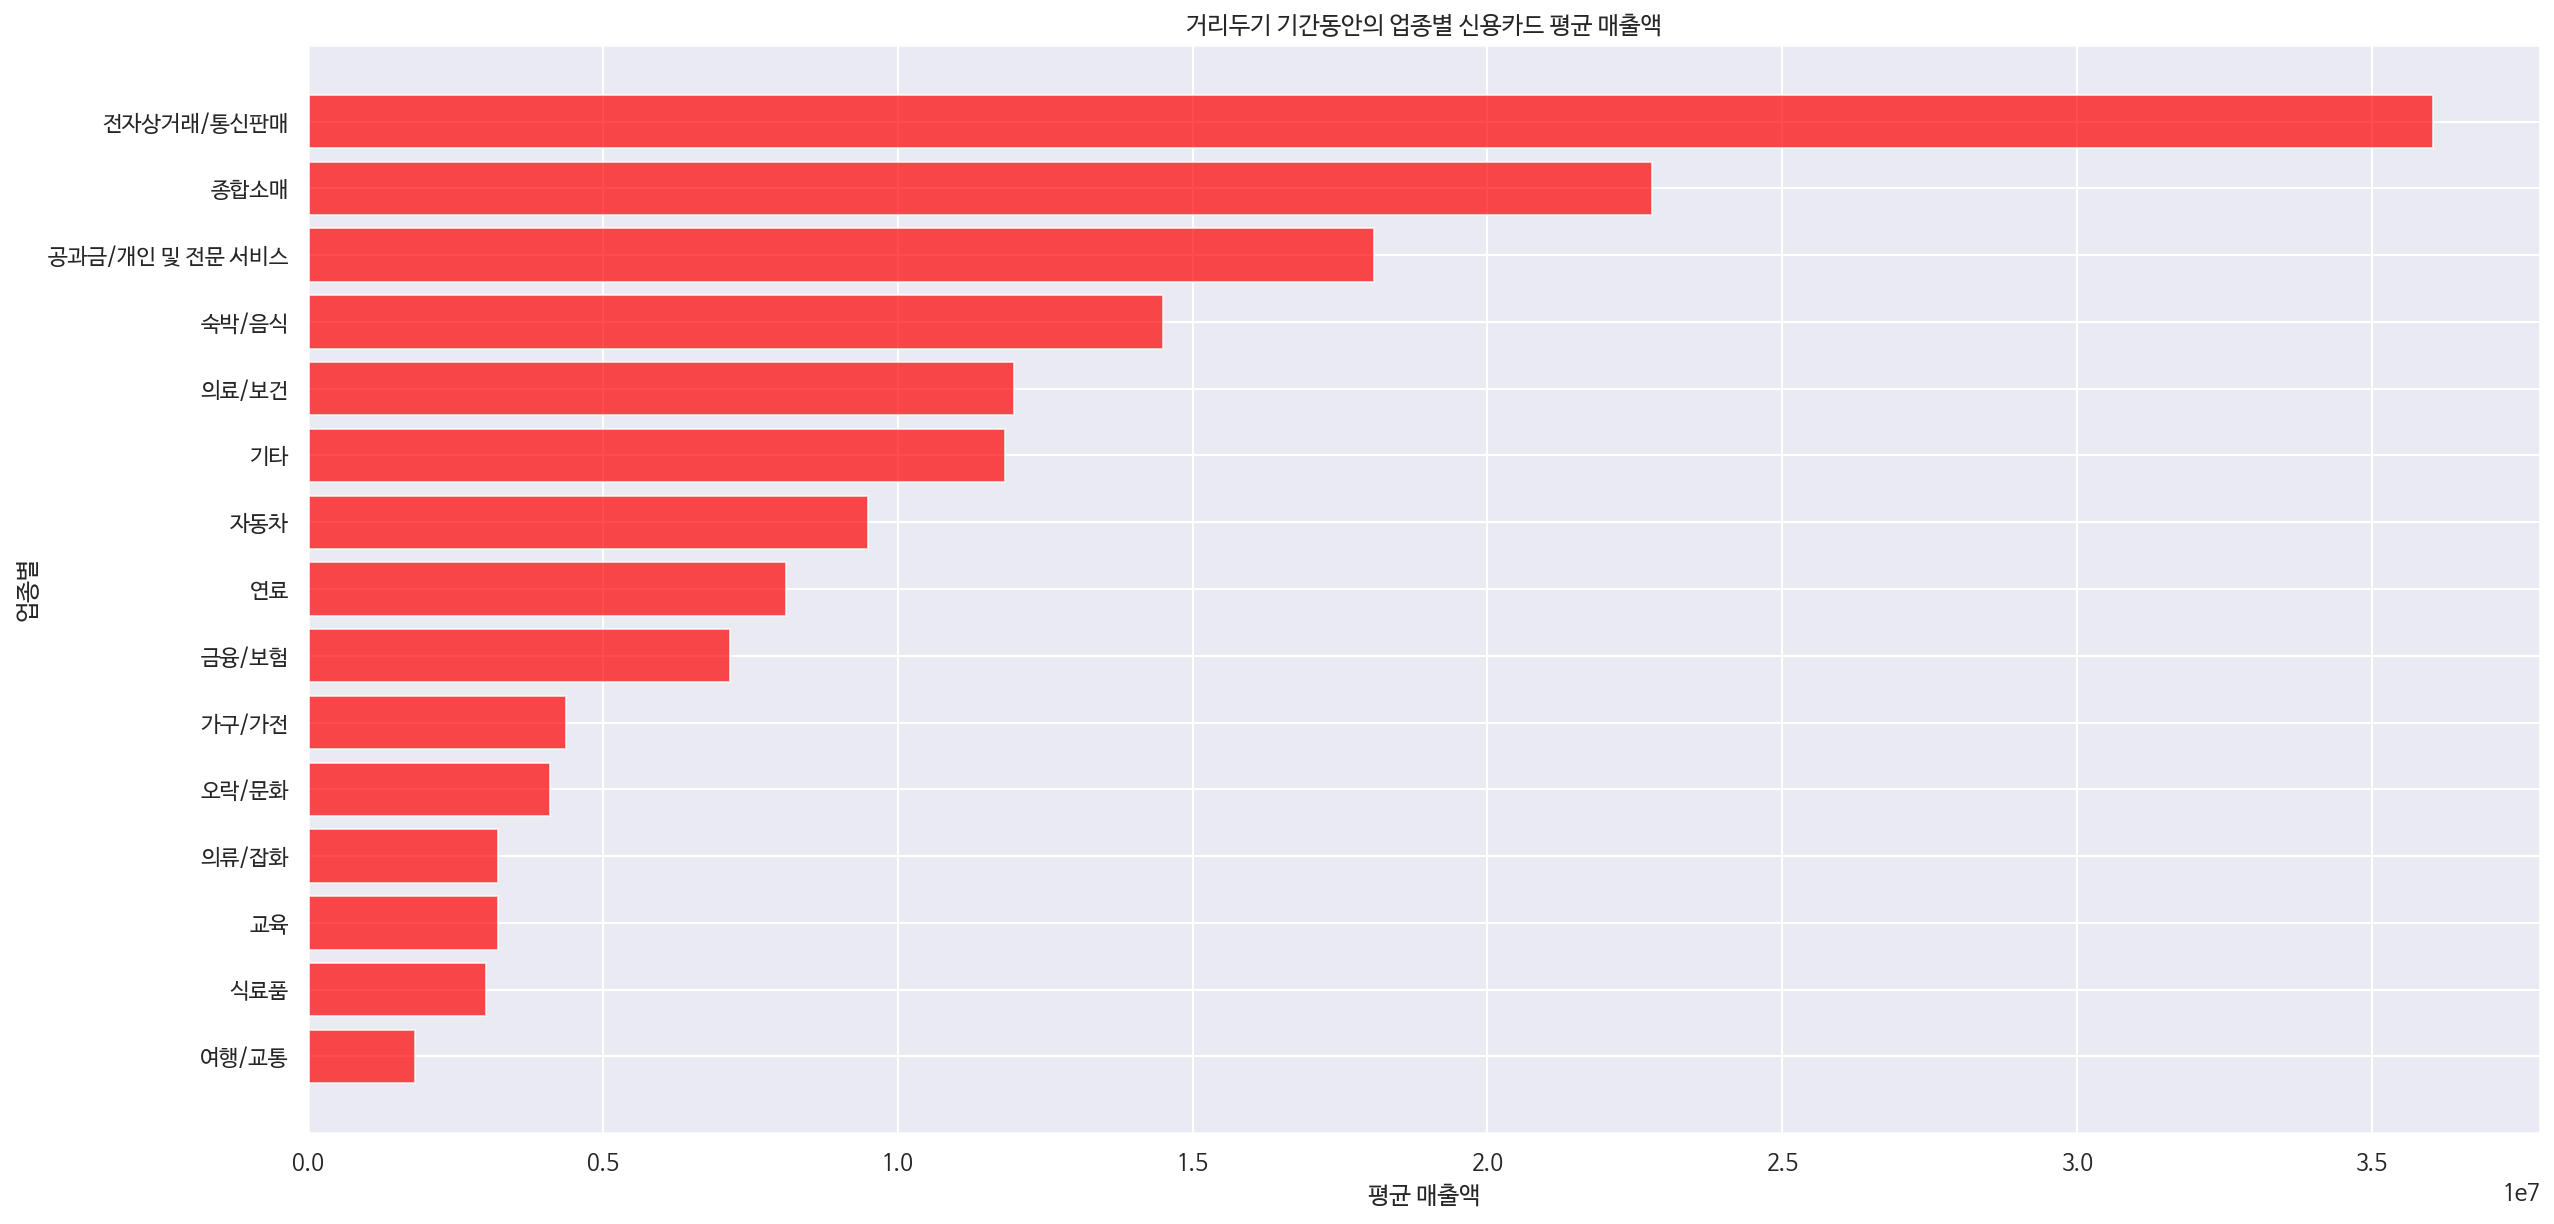

In [ ]:
# 테스트 - 거리두기 on 시각화 - 오름차순 정렬 사용
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20,10))


y= df2_on.iloc[:,1:].mean().sort_values()

x = y.reset_index()['index']

plt.barh(x, y, align='center', alpha=0.7, color='red')

plt.xlabel('평균 매출액')
plt.ylabel('업종별')
plt.title('거리두기 기간동안의 업종별 신용카드 평균 매출액')
plt.show()

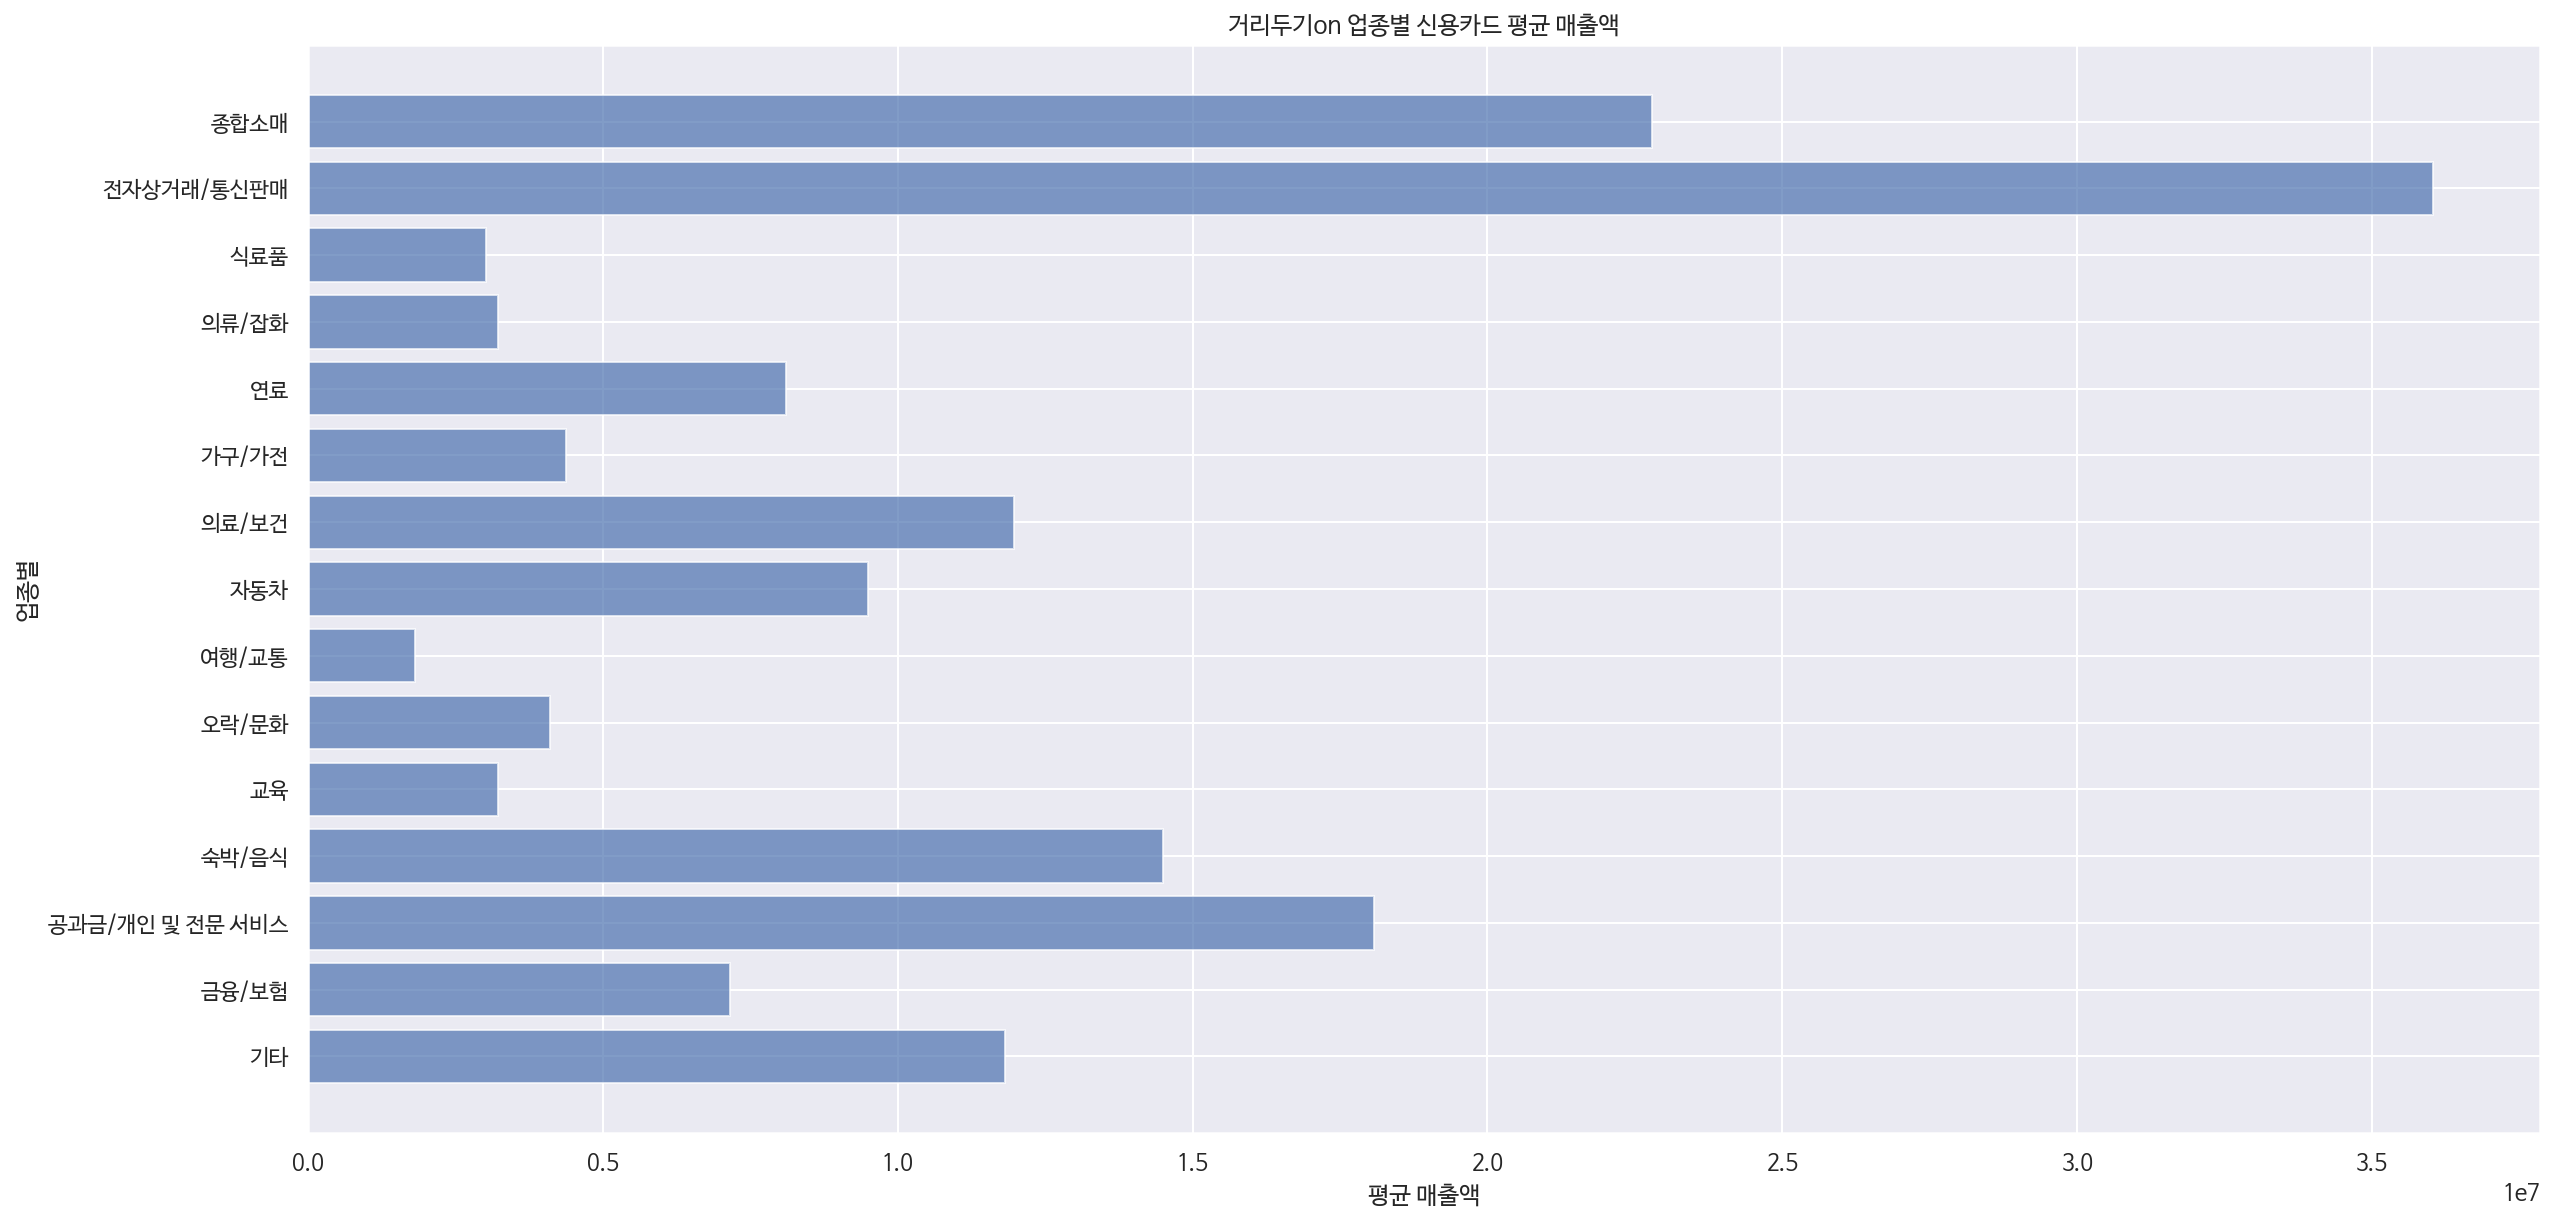

In [ ]:
# 거리두기 on만
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20,10))

x = df2_on.iloc[:,1:].mean()[::-1]
y = df2_on.iloc[:,1:].columns[::-1]

plt.barh(y, x,align='center', alpha=0.7)

plt.xlabel('평균 매출액')
plt.ylabel('업종별')
plt.title('거리두기on 업종별 신용카드 평균 매출액')
plt.show()

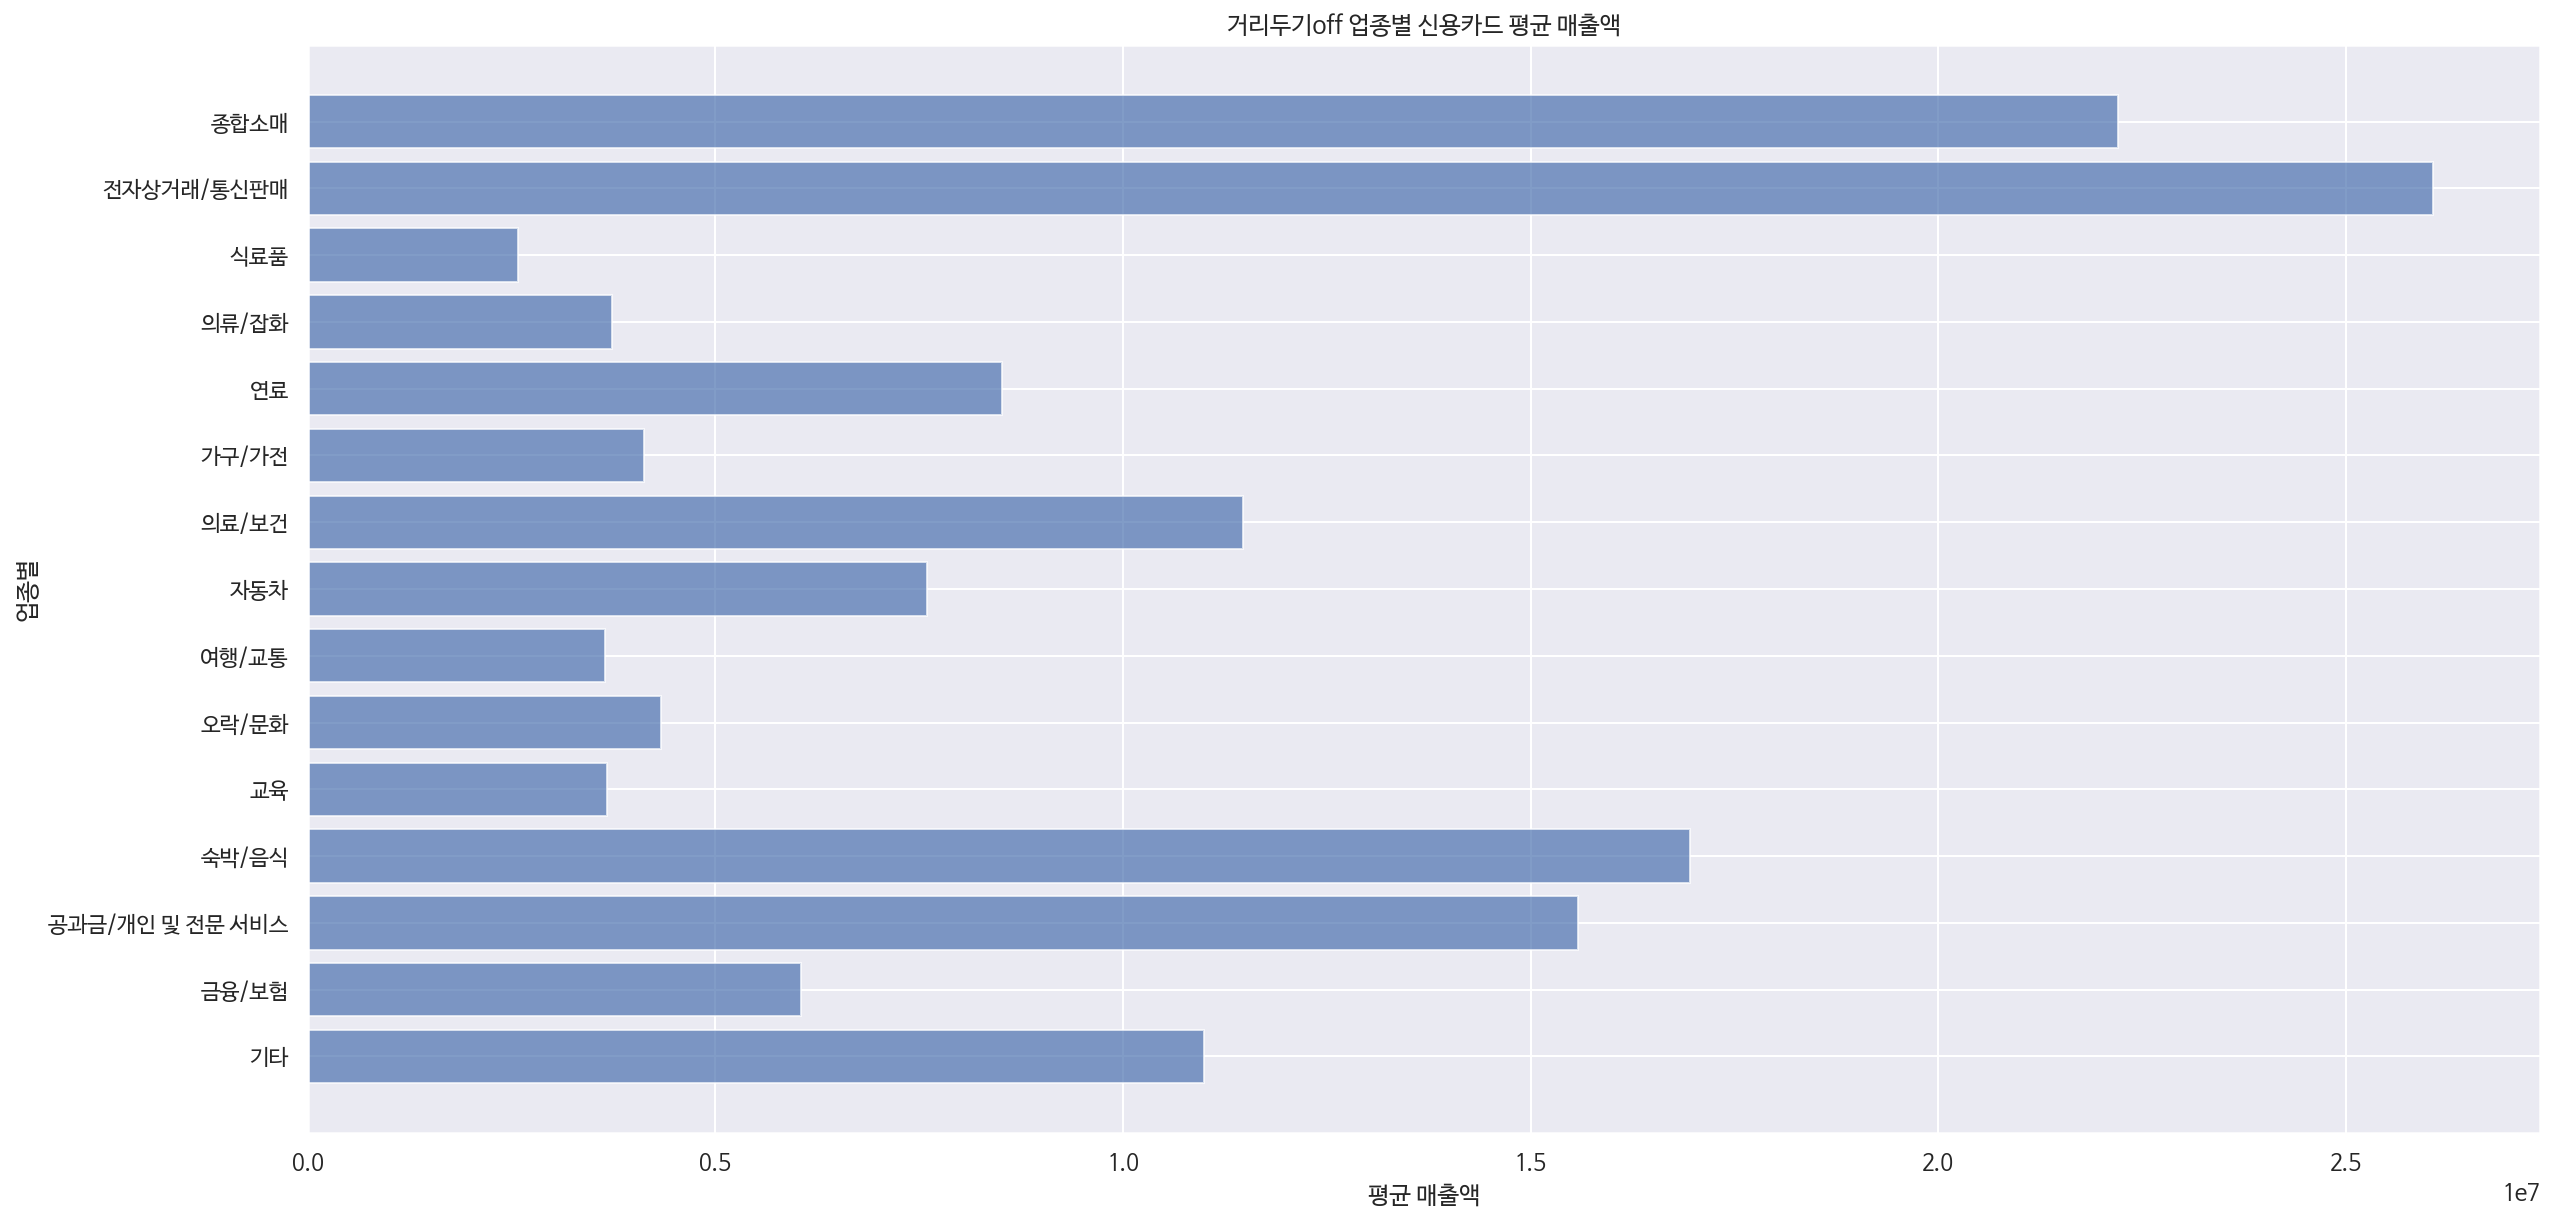

In [ ]:
# 거리두기 off만
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20,10))

x = df2_off.iloc[:,1:].mean()[::-1]
y = df2_on.iloc[:,1:].columns[::-1]

plt.barh(y, x,align='center', alpha=0.7)

plt.xlabel('평균 매출액')
plt.ylabel('업종별')
plt.title('거리두기off 업종별 신용카드 평균 매출액')
plt.show()

### ‼ 시각화 부분 에러-> 수정하기

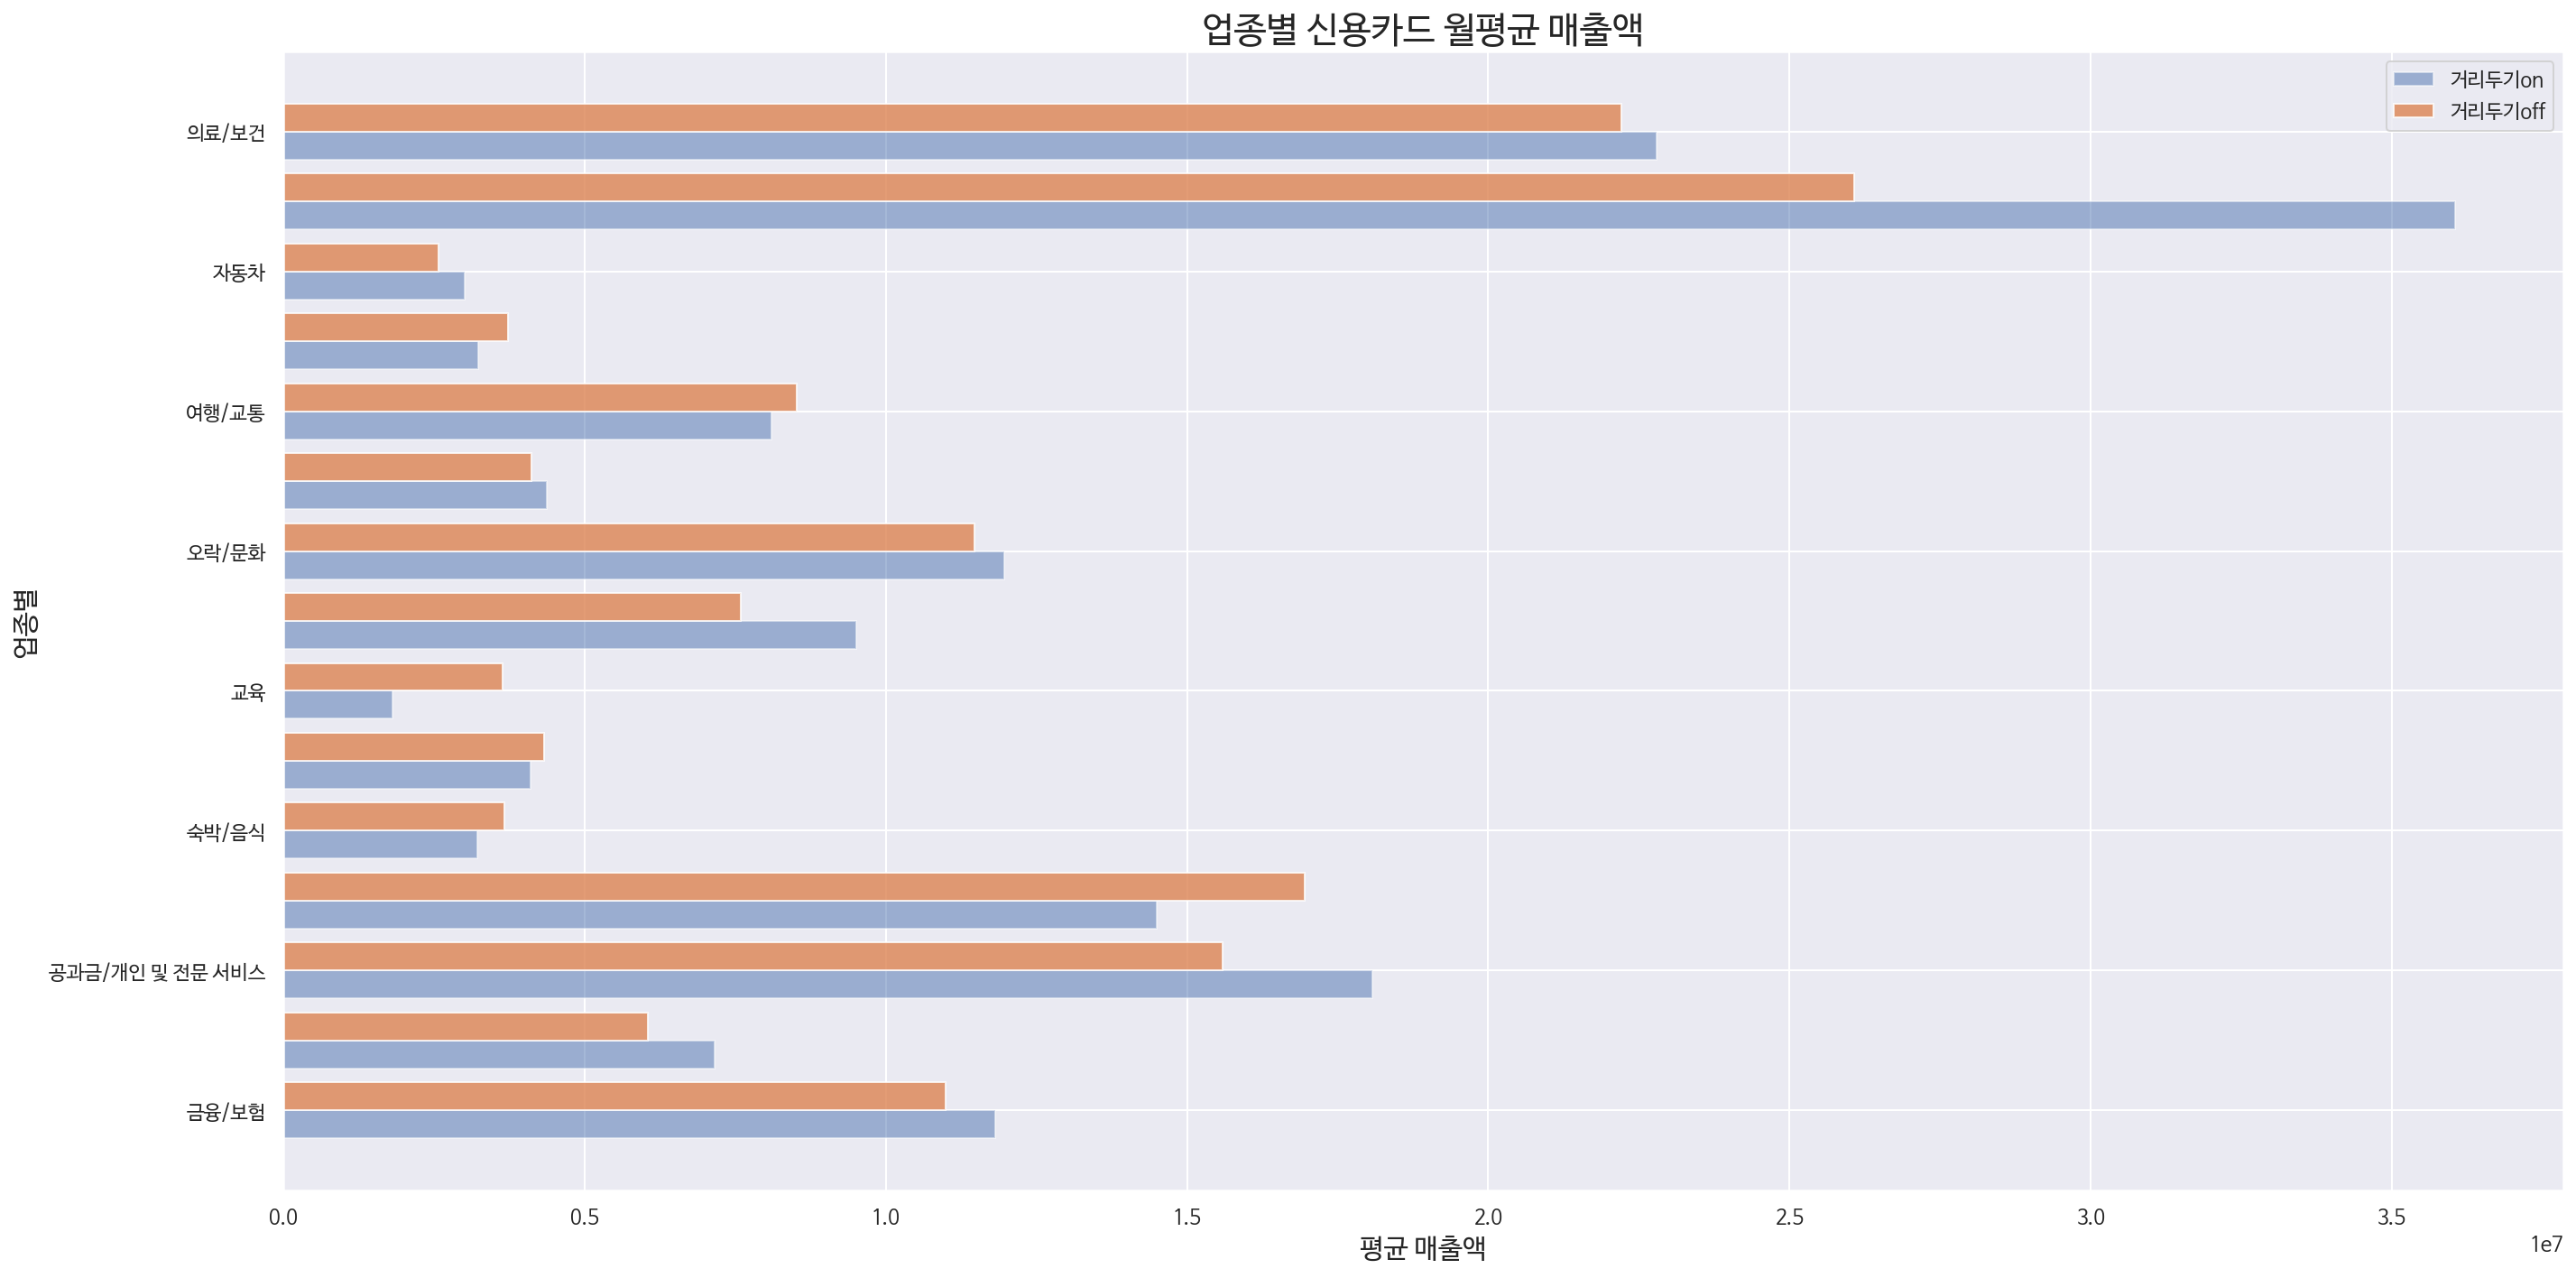

In [ ]:
# 시각화-barh plot으로 비교 확인
plt.rc('font', family='NanumBarunGothic')

x_1 = df2_on.iloc[:,1:].mean()[::-1]
x_2 = df2_off.iloc[:,1:].mean()[::-1]

#y = df2_on.iloc[:,1:].columns[::-1]
y = list(df2_on.iloc[:,1:].columns[::-1])
y_ar = np.arange(len(y))


width = 0.4
#height = 1
fig, axes = plt.subplots()
fig.set_size_inches((20, 10))

axes.barh(y_ar - width/2 , x_1, width ,align='center', alpha=0.5)
axes.barh(y_ar + width/2, x_2, width , align='center', alpha=0.8)

# yticks 설정
axes.set_yticklabels(y)
#plt.yticks(y)

plt.xlabel('평균 매출액',fontsize=15)
plt.ylabel('업종별',fontsize=15)
plt.title('업종별 신용카드 월평균 매출액',fontsize=20)
plt.legend(['거리두기on','거리두기off'])
plt.tight_layout()
plt.show()

In [ ]:
list(df2_on.iloc[:,1:].columns[::-1])

['기타',
 '금융/보험',
 '공과금/개인 및 전문 서비스',
 '숙박/음식',
 '교육',
 '오락/문화',
 '여행/교통',
 '자동차',
 '의료/보건',
 '가구/가전',
 '연료',
 '의류/잡화',
 '식료품',
 '전자상거래/통신판매',
 '종합소매']

In [ ]:
# # 시각화-bar plot으로 비교 확인
# # 거리두기 on 시각화
# plt.rc('font', family='NanumBarunGothic')

# x_1 = df2_on.iloc[:,1:].sum()[::-1]
# x_2 = df2_off.iloc[:,1:].sum()[::-1]

# y = df2_on.iloc[:,1:].columns[::-1]
# #y = np.arange(len(y_label))

# width = 0.4
# fig, axes = plt.subplots()
# fig.set_size_inches((20, 10))

# axes.barh(y, x_1, width, align='center', alpha=0.5)
# axes.barh(y, x_2, width, align='center', alpha=0.8)

# # x축 설정
# #axes.set_xlim([0,9])
# axes.set_xticks(x_1)
# axes.set_xlabel('소비금액')

# #y축 설정
# axes.set_yticks(range(len(y)))
# axes.set_yticklabels(y)
# axes.set_ylabel('업종별')

# #plt.barh(y, x, align='center', alpha=0.7, color='red')

# # plt.xlabel('소비금액')
# # plt.ylabel('업종별')
# plt.title('업종별 신용카드 소비액')

# plt.legend(['거리두기on','거리두기off'])
# plt.show()

In [ ]:
df2_on.iloc[:,1:].columns[::-1]

Index(['기타', '금융/보험', '공과금/개인 및 전문 서비스', '숙박/음식', '교육', '오락/문화', '여행/교통',
       '자동차', '의료/보건', '가구/가전', '연료', '의류/잡화', '식료품', '전자상거래/통신판매', '종합소매'],
      dtype='object')

In [ ]:
df2_on.iloc[:,1:].mean()[::-1]

기타                 1.181238e+07
금융/보험              7.163205e+06
공과금/개인 및 전문 서비스    1.808266e+07
숙박/음식              1.449337e+07
교육                 3.229342e+06
오락/문화              4.104312e+06
여행/교통              1.813057e+06
자동차                9.504337e+06
의료/보건              1.196967e+07
가구/가전              4.379681e+06
연료                 8.103020e+06
의류/잡화              3.232344e+06
식료품                3.019201e+06
전자상거래/통신판매         3.603856e+07
종합소매               2.278605e+07
dtype: float64

### 특성 추가 (업종별 증가율)

In [ ]:
df2sum_on = df2[df2['월별'] > '2020/02'].iloc[:,1:].mean()
df2sum_on = pd.Series(df2sum_on, name='on')
df2sum_off = df2[df2['월별'] <= '2020/02'].iloc[:,1:].mean()
df2sum_off = pd.Series(df2sum_off, name='off')

df2mean_onoff = pd.merge(df2sum_off, df2sum_on, left_index= True, right_index=True)

df2mean_onoff 

,off,on
종합소매,2.220879e+07,2.278605e+07
전자상거래/통신판매,2.607574e+07,3.603856e+07
식료품,2.583775e+06,3.019201e+06
의류/잡화,3.736481e+06,3.232344e+06
연료,8.518386e+06,8.103020e+06
가구/가전,4.122964e+06,4.379681e+06
의료/보건,1.146648e+07,1.196967e+07
자동차,7.598033e+06,9.504337e+06
여행/교통,3.648483e+06,1.813057e+06
오락/문화,4.337241e+06,4.104312e+06


In [ ]:
#증감비
df2mean_onoff['on'] / df2mean_onoff['off']

종합소매               1.025992
전자상거래/통신판매         1.382073
식료품                1.168524
의류/잡화              0.865077
연료                 0.951239
가구/가전              1.062265
의료/보건              1.043883
자동차                1.250894
여행/교통              0.496934
오락/문화              0.946296
교육                 0.880902
숙박/음식              0.854721
공과금/개인 및 전문 서비스    1.160339
금융/보험              1.183779
기타                 1.074611
dtype: float64

In [ ]:
df2mean_onoff['증감률'] = (df2mean_onoff['on'] / df2mean_onoff['off'] -1) * 100
df2mean_onoff['증감률'] = np.round(df2mean_onoff['증감률'], 2)  # 소수점 2 까지 반올림
df2mean_onoff

,off,on,증감률
종합소매,2.220879e+07,2.278605e+07,2.60
전자상거래/통신판매,2.607574e+07,3.603856e+07,38.21
식료품,2.583775e+06,3.019201e+06,16.85
의류/잡화,3.736481e+06,3.232344e+06,-13.49
연료,8.518386e+06,8.103020e+06,-4.88
가구/가전,4.122964e+06,4.379681e+06,6.23
의료/보건,1.146648e+07,1.196967e+07,4.39
자동차,7.598033e+06,9.504337e+06,25.09
여행/교통,3.648483e+06,1.813057e+06,-50.31
오락/문화,4.337241e+06,4.104312e+06,-5.37


### 시각화2

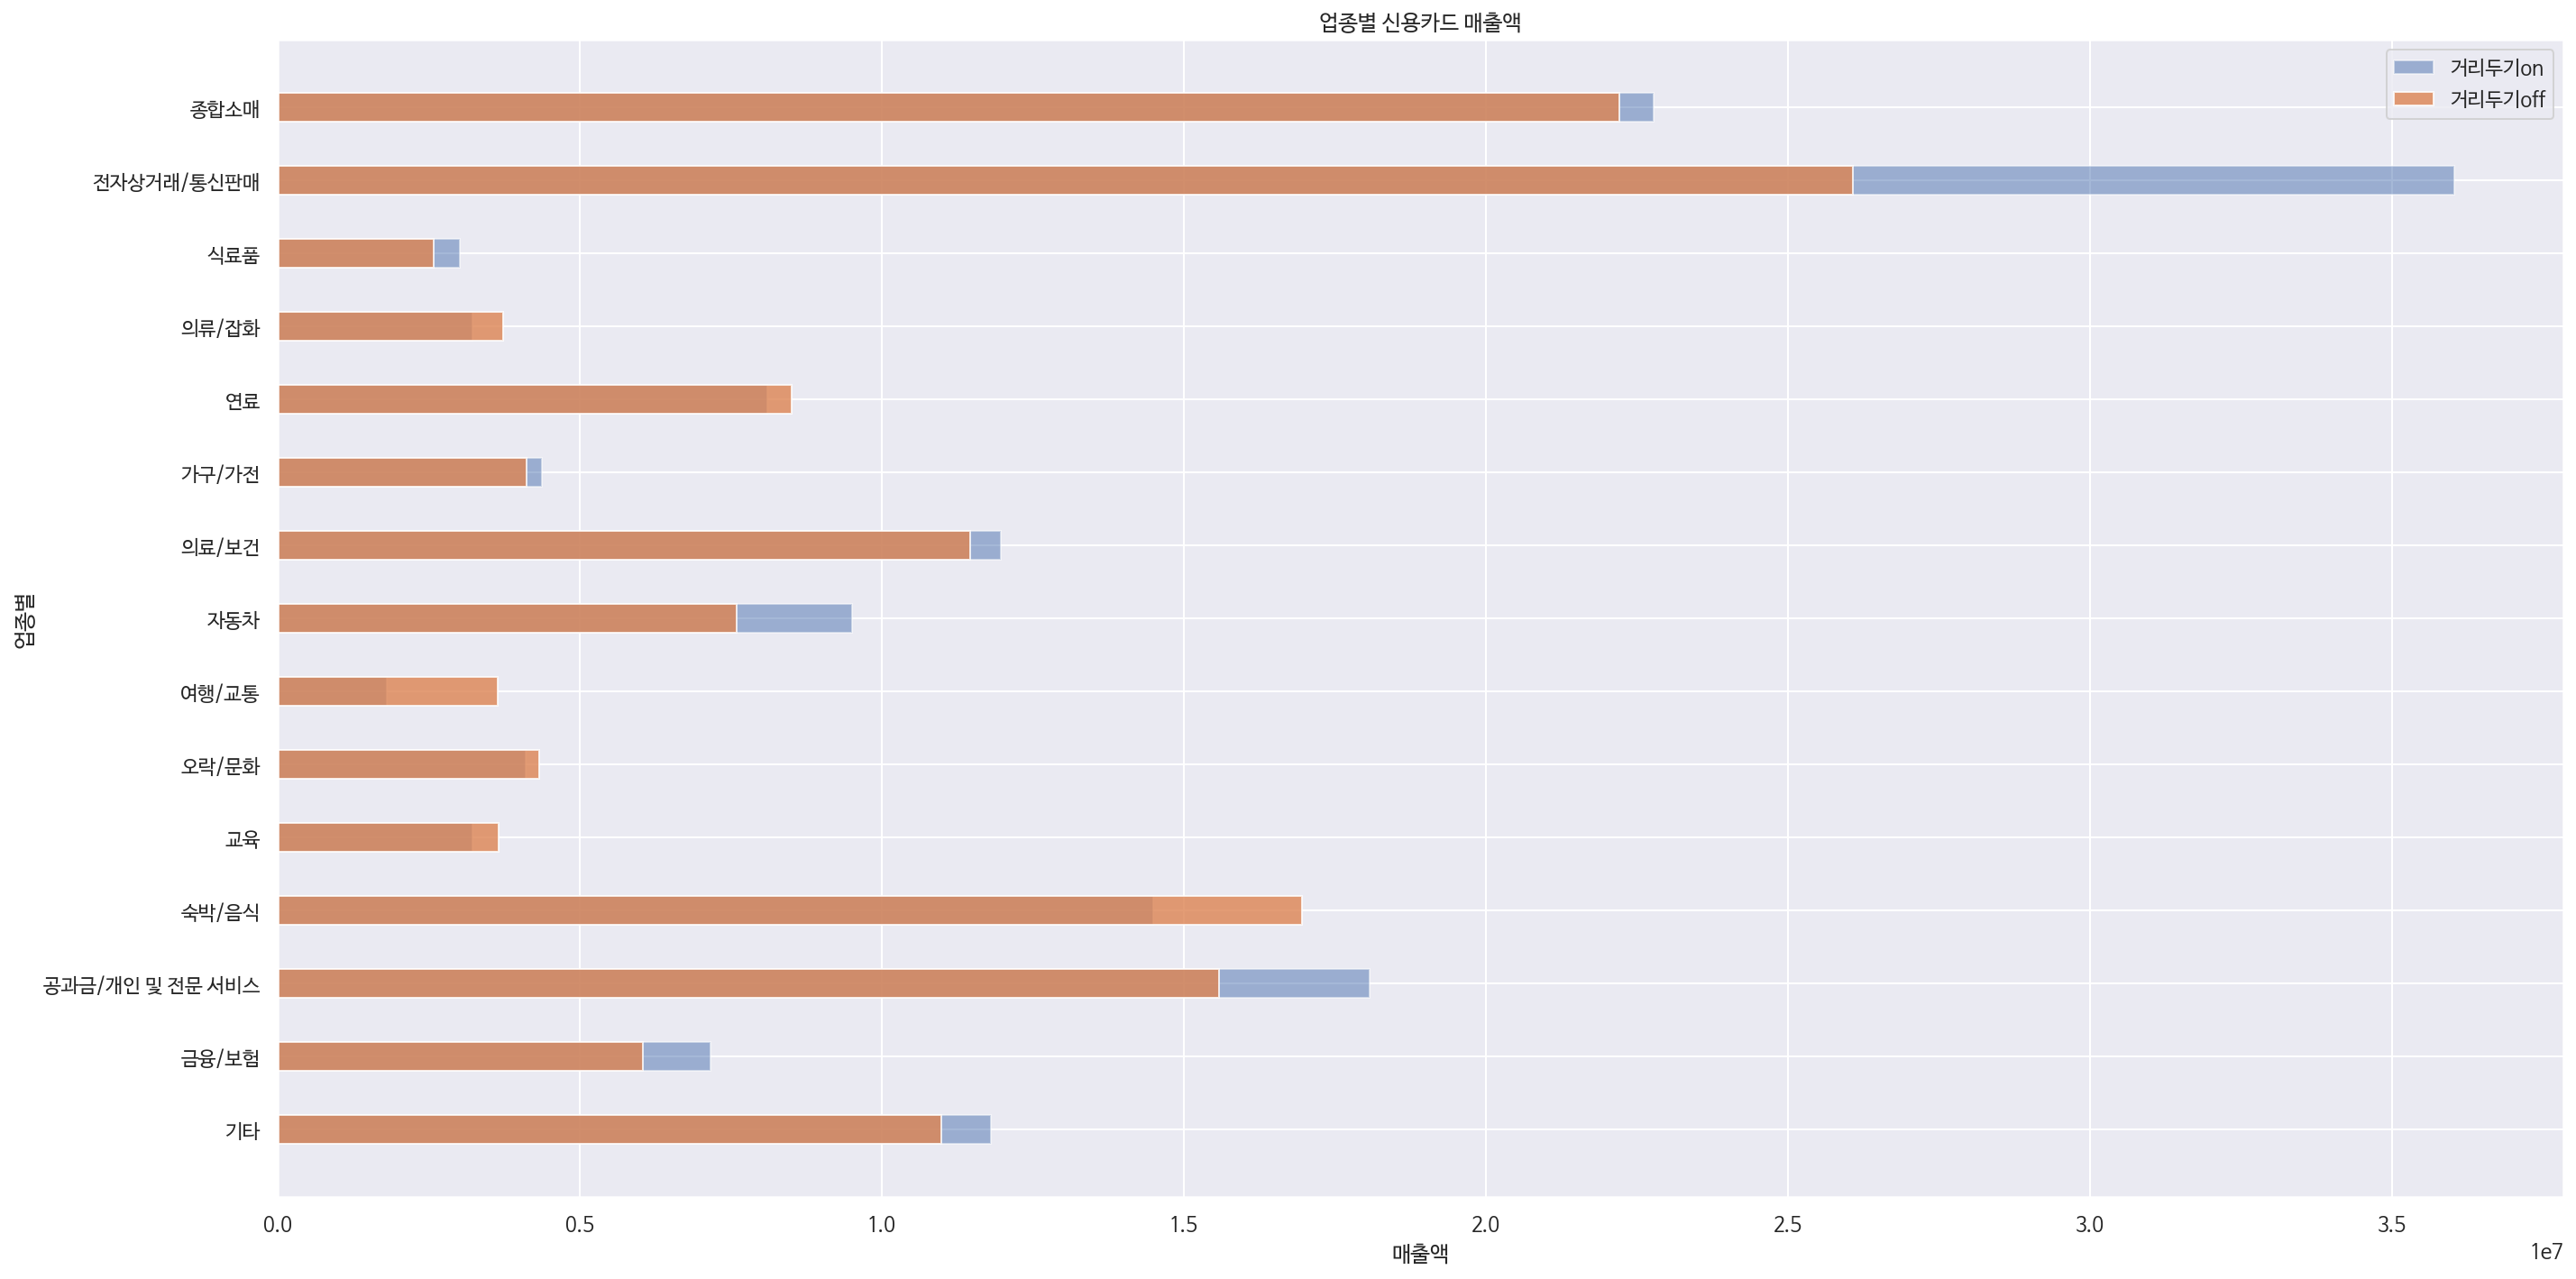

In [ ]:
# 시각화-barh plot으로 비교 확인
plt.rc('font', family='NanumBarunGothic')

x_1 = df2mean_onoff['on'][::-1]
x_2 = df2mean_onoff['off'][::-1]

#y = df2_on.iloc[:,1:].columns[::-1]
y = df2mean_onoff.index[::-1]
y_ar = np.arange(len(y))


width = 0.4
#height = 1
fig, axes = plt.subplots()
fig.set_size_inches((20, 10))

axes.barh(y , x_1, width ,align='center', alpha=0.5)
axes.barh(y, x_2 , width , align='center', alpha=0.8)

# yticks 설정
#axes.set_yticklabels(y)
#y_ar + width/2
axes.set_yticks(y_ar)

#plt.yticks(y)

plt.xlabel('매출액')
plt.ylabel('업종별')
plt.title('업종별 신용카드 매출액')
plt.legend(['거리두기on','거리두기off'])
plt.tight_layout()
plt.show()

In [ ]:
df2mean_onoff.index[:].to_list()

['종합소매',
 '전자상거래/통신판매',
 '식료품',
 '의류/잡화',
 '연료',
 '가구/가전',
 '의료/보건',
 '자동차',
 '여행/교통',
 '오락/문화',
 '교육',
 '숙박/음식',
 '공과금/개인 및 전문 서비스',
 '금융/보험',
 '기타']

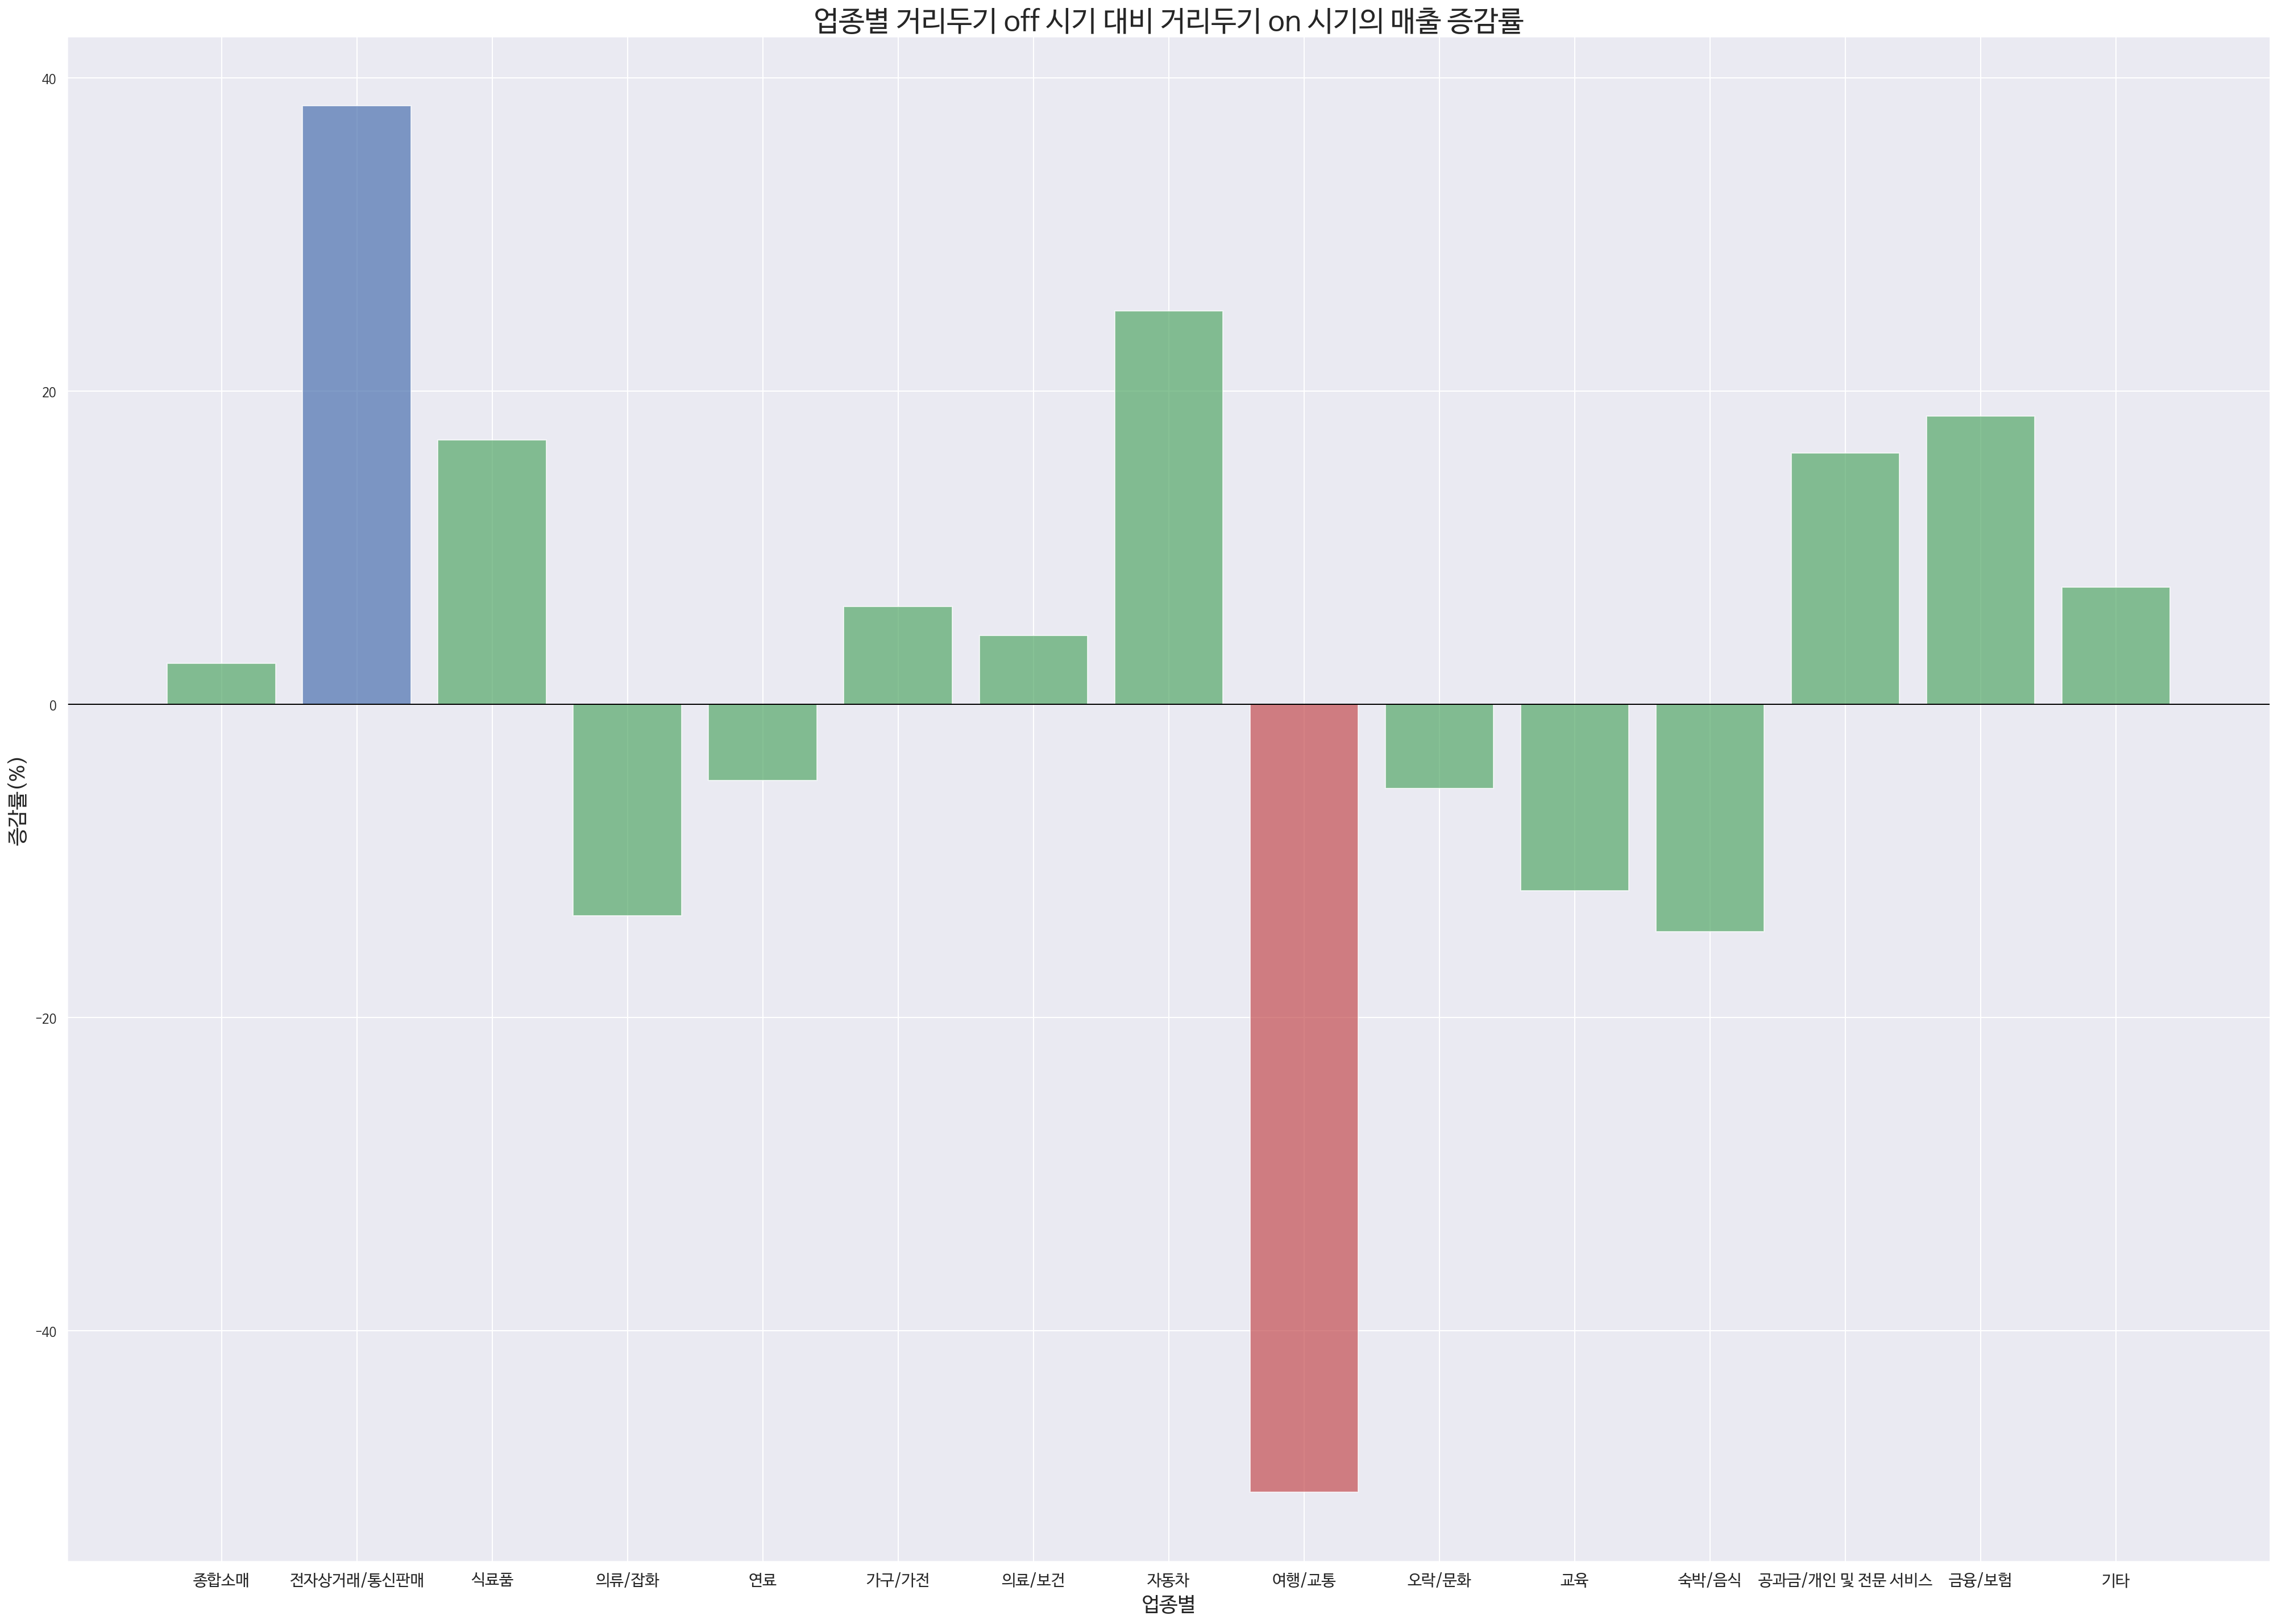

In [ ]:
# 증감률 시각화
plt.rc('font', family='NanumBarunGothic')

x = df2mean_onoff.index[:].to_list()
y = df2mean_onoff['증감률'].to_list()

plt.figure(figsize=(28,20))
xtick_label_position = list(range(len(x)))
axes = fig.add_subplot()

bars = plt.bar(xtick_label_position, y, align='center', color=['g','b','g','g','g','g','g','g','r','g','g','g','g','g','g'],alpha=0.7)

plt.rcParams['axes.unicode_minus'] = False  #음수기호 깨짐 방지

plt.xticks(xtick_label_position, x ,fontsize=14)
plt.axhline(y=0, color='black', linewidth=1)

for i, b in enumerate(bars):   #막대그래프 위에 몇퍼센트인지 표시하려고 한 시도
  if i == 8:  #여행/ 교통은 감소그래프니까 if 로 따로 처리해줬는데 안됨. 걍 텍스트 자체가 안나옴.
    axes.text(b.get_x(),b.get_height()-0.1, y[i], ha='center',fontsize=13)
  else :
    axes.text(b.get_x(),b.get_height()+0.1, y[i], ha='center',fontsize=13)

plt.xlabel('업종별',fontsize=18)
plt.ylabel('증감률(%)',fontsize=18)
plt.title('업종별 거리두기 off 시기 대비 거리두기 on 시기의 매출 증감률',fontsize = 25)
plt.tight_layout()
plt.show()

## 분석3 : 세분화된 업종으로 거리두기 on ,off 의 소비차이 확인하기

### 데이터 정제1

In [ ]:
# 평균 매출액 합계를 정수타입으로 구하기위해 타입캐스팅 해준다.
df2mean_onoff.iloc[:, :-1] = df2mean_onoff.iloc[:, :-1].astype(int)
df2mean_onoff

,off,on,증감률
종합소매,22208793,22786045,2.60
전자상거래/통신판매,26075736,36038560,38.21
식료품,2583774,3019201,16.85
의류/잡화,3736481,3232344,-13.49
연료,8518386,8103019,-4.88
가구/가전,4122963,4379681,6.23
의료/보건,11466482,11969667,4.39
자동차,7598033,9504336,25.09
여행/교통,3648483,1813057,-50.31
오락/문화,4337240,4104311,-5.37


In [ ]:
# 평균 매출 합계 구해서 칼럼에 추가 후 비중 구하기

# off 합계
df2mean_onoff['off 합계'] = df2mean_onoff['off'].sum()

# on 합계
df2mean_onoff['on 합계'] = df2mean_onoff['on'].sum()

# off 비중
df2mean_onoff['off 비중'] = df2mean_onoff['off'] /df2mean_onoff['off 합계'] *100

# on 비중
df2mean_onoff['on 비중'] = df2mean_onoff['on'] /df2mean_onoff['on 합계'] *100

# 비중 변화비 (off->of)
df2mean_onoff['off->on 비중변화비'] = df2mean_onoff['on 비중'] / df2mean_onoff['off 비중']

df2mean_onoff

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
종합소매,22208793,22786045,2.60,147546482,159731180,15.052065,14.265246,0.947727
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.672896,22.562007,1.276645
식료품,2583774,3019201,16.85,147546482,159731180,1.751159,1.890176,1.079386
의류/잡화,3736481,3232344,-13.49,147546482,159731180,2.532409,2.023615,0.799087
연료,8518386,8103019,-4.88,147546482,159731180,5.773358,5.072910,0.878676
가구/가전,4122963,4379681,6.23,147546482,159731180,2.794349,2.741907,0.981233
의료/보건,11466482,11969667,4.39,147546482,159731180,7.771437,7.493632,0.964253
자동차,7598033,9504336,25.09,147546482,159731180,5.149586,5.950207,1.155473
여행/교통,3648483,1813057,-50.31,147546482,159731180,2.472769,1.135068,0.459027
오락/문화,4337240,4104311,-5.37,147546482,159731180,2.939575,2.569511,0.874110


In [ ]:
# 실수 -> 반올림하기
df2mean_onoff['off 비중'] = np.round(df2mean_onoff['off 비중'], 1)
df2mean_onoff['on 비중'] = np.round(df2mean_onoff['on 비중'], 1)
df2mean_onoff['off->on 비중변화비'] = np.round(df2mean_onoff['off->on 비중변화비'], 2)
df2mean_onoff

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
종합소매,22208793,22786045,2.60,147546482,159731180,15.1,14.3,0.95
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.7,22.6,1.28
식료품,2583774,3019201,16.85,147546482,159731180,1.8,1.9,1.08
의류/잡화,3736481,3232344,-13.49,147546482,159731180,2.5,2.0,0.80
연료,8518386,8103019,-4.88,147546482,159731180,5.8,5.1,0.88
가구/가전,4122963,4379681,6.23,147546482,159731180,2.8,2.7,0.98
의료/보건,11466482,11969667,4.39,147546482,159731180,7.8,7.5,0.96
자동차,7598033,9504336,25.09,147546482,159731180,5.1,6.0,1.16
여행/교통,3648483,1813057,-50.31,147546482,159731180,2.5,1.1,0.46
오락/문화,4337240,4104311,-5.37,147546482,159731180,2.9,2.6,0.87


In [ ]:
# off 시기의 평균매출 순위 (6위까지) - 기타 업종은 빼고
df2mean_onoff.sort_values(by='off 비중', ascending=False).head(7)

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.7,22.6,1.28
종합소매,22208793,22786045,2.60,147546482,159731180,15.1,14.3,0.95
숙박/음식,16956847,14493365,-14.53,147546482,159731180,11.5,9.1,0.79
공과금/개인 및 전문 서비스,15583944,18082664,16.03,147546482,159731180,10.6,11.3,1.07
의료/보건,11466482,11969667,4.39,147546482,159731180,7.8,7.5,0.96
기타,10992239,11812384,7.46,147546482,159731180,7.5,7.4,0.99
연료,8518386,8103019,-4.88,147546482,159731180,5.8,5.1,0.88


In [ ]:
# on 시기의 평균매출 순위 (6위까지) - 기타 업종은 빼고
df2mean_onoff.sort_values(by='on 비중', ascending=False).head(7)

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.7,22.6,1.28
종합소매,22208793,22786045,2.60,147546482,159731180,15.1,14.3,0.95
공과금/개인 및 전문 서비스,15583944,18082664,16.03,147546482,159731180,10.6,11.3,1.07
숙박/음식,16956847,14493365,-14.53,147546482,159731180,11.5,9.1,0.79
의료/보건,11466482,11969667,4.39,147546482,159731180,7.8,7.5,0.96
기타,10992239,11812384,7.46,147546482,159731180,7.5,7.4,0.99
자동차,7598033,9504336,25.09,147546482,159731180,5.1,6.0,1.16


In [ ]:
# 파이차트 sizes 테스트
f = list(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[[0,1,2,3,4,6],5])
f.append(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[7:,5].sum() + 7.5)
f

[17.7, 15.1, 11.5, 10.6, 7.8, 5.8, 31.7]

In [ ]:
df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[7:,5].sum() + 7.5

31.7

In [ ]:
# 파이차트 labels 테스트
d=list(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[[0,1,2,3,4,6],5].index[:])
d.append('기타')
d

['전자상거래/통신판매', '종합소매', '숙박/음식', '공과금/개인 및 전문 서비스', '의료/보건', '연료', '기타']

In [ ]:
d

['전자상거래/통신판매', '종합소매', '숙박/음식', '공과금/개인 및 전문 서비스', '의료/보건', '연료', '기타']

In [ ]:
# off 시기의 평균매출 하위 5개
df2mean_onoff.sort_values(by='off 비중', ascending=False).tail()

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
가구/가전,4122963,4379681,6.23,147546482,159731180,2.8,2.7,0.98
의류/잡화,3736481,3232344,-13.49,147546482,159731180,2.5,2.0,0.80
여행/교통,3648483,1813057,-50.31,147546482,159731180,2.5,1.1,0.46
교육,3665947,3229342,-11.91,147546482,159731180,2.5,2.0,0.81
식료품,2583774,3019201,16.85,147546482,159731180,1.8,1.9,1.08


In [ ]:
# on 시기의 평균매출 하위 5개
df2mean_onoff.sort_values(by='on 비중', ascending=False)

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.7,22.6,1.28
종합소매,22208793,22786045,2.60,147546482,159731180,15.1,14.3,0.95
공과금/개인 및 전문 서비스,15583944,18082664,16.03,147546482,159731180,10.6,11.3,1.07
숙박/음식,16956847,14493365,-14.53,147546482,159731180,11.5,9.1,0.79
의료/보건,11466482,11969667,4.39,147546482,159731180,7.8,7.5,0.96
기타,10992239,11812384,7.46,147546482,159731180,7.5,7.4,0.99
자동차,7598033,9504336,25.09,147546482,159731180,5.1,6.0,1.16
연료,8518386,8103019,-4.88,147546482,159731180,5.8,5.1,0.88
금융/보험,6051134,7163204,18.38,147546482,159731180,4.1,4.5,1.09
가구/가전,4122963,4379681,6.23,147546482,159731180,2.8,2.7,0.98


In [ ]:
df2mean_onoff['증감률'].sort_values(ascending=False)

전자상거래/통신판매         38.21
자동차                25.09
금융/보험              18.38
식료품                16.85
공과금/개인 및 전문 서비스    16.03
기타                  7.46
가구/가전               6.23
의료/보건               4.39
종합소매                2.60
연료                 -4.88
오락/문화              -5.37
교육                -11.91
의류/잡화             -13.49
숙박/음식             -14.53
여행/교통             -50.31
Name: 증감률, dtype: float64

### 시각화1

In [ ]:
sns.dark_palette("#69d",7, reverse=True)

[(0.4, 0.6, 0.8666666666666667),
 (0.3573658516294959, 0.5255685286180811, 0.750627609476877),
 (0.31371660448826555, 0.4493648793461167, 0.6318257175920924),
 (0.27006735734703513, 0.3731612300741522, 0.5130238257073076),
 (0.22743320897653102, 0.2987297586922334, 0.396984768517518),
 (0.1837839618353006, 0.2225261094202689, 0.27818287663273333),
 (0.1411498134647965, 0.14809463803835013, 0.1621438194429436)]

In [ ]:
sns.diverging_palette(220, 20, n= 7)

[(0.24715576253545807, 0.49918708160096675, 0.5765599057376697),
 (0.4747269543922225, 0.6467036505915477, 0.7000106665462165),
 (0.7104151060775834, 0.7994818085151538, 0.8278646422701351),
 (0.9500463204266012, 0.9458771880685795, 0.945349903258932),
 (0.8891061436059952, 0.7434398764378928, 0.7071270374029315),
 (0.8251898038036325, 0.5355631912675891, 0.46229370933409736),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]

In [ ]:
sns.color_palette("coolwarm",7)

[(0.383662065772549, 0.5101834172862746, 0.9178306732313726),
 (0.5543118699137254, 0.6900970112156862, 0.9955155482352941),
 (0.724041371882353, 0.8149103926470588, 0.9756509706470589),
 (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
 (0.9595176584705882, 0.7669728545098039, 0.6741447150392157),
 (0.9566532109764706, 0.598033822717647, 0.4773022923529412),
 (0.8653913329372549, 0.3711276720470588, 0.2957689564156863)]

In [ ]:
sns.color_palette("BuGn_r",7)

[(0.0005382545174932718, 0.42791234140715106, 0.17293348712033832),
 (0.1381776239907728, 0.5461745482506728, 0.2720953479430988),
 (0.25660899653979236, 0.683275663206459, 0.4648673587081892),
 (0.4031372549019608, 0.7621376393694732, 0.6454133025759323),
 (0.6039215686274509, 0.8485966935793925, 0.7904652056901191),
 (0.8023068050749712, 0.9263206459054211, 0.9037139561707036),
 (0.8999769319492503, 0.9615378700499808, 0.9769011918492887)]

In [ ]:
sns.color_palette("bone",9)

[(0.08578431372549018, 0.08578428015768168, 0.11935208866155156),
 (0.17500000000000002, 0.17499993152167065, 0.24347826086956523),
 (0.2607843137254902, 0.26078421167935234, 0.36283034953111676),
 (0.35000000000000003, 0.3614583209634784, 0.4749998818750679),
 (0.4392156862745098, 0.4841298686810369, 0.5642155882230956),
 (0.525, 0.6020832799479201, 0.6499999212500452),
 (0.6142156862745098, 0.7247548276654785, 0.739215627598073),
 (0.7265624015624016, 0.825, 0.8249999606250226),
 (0.8659619615501968, 0.9142156862745098, 0.9142156669730502)]

In [ ]:
sns.color_palette("binary_r",9)

[(0.09803921568627451, 0.09803921568627451, 0.09803921568627451),
 (0.2, 0.2, 0.2),
 (0.2980392156862745, 0.2980392156862745, 0.2980392156862745),
 (0.4, 0.4, 0.4),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.6, 0.6, 0.6),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.8, 0.8, 0.8),
 (0.9019607843137255, 0.9019607843137255, 0.9019607843137255)]

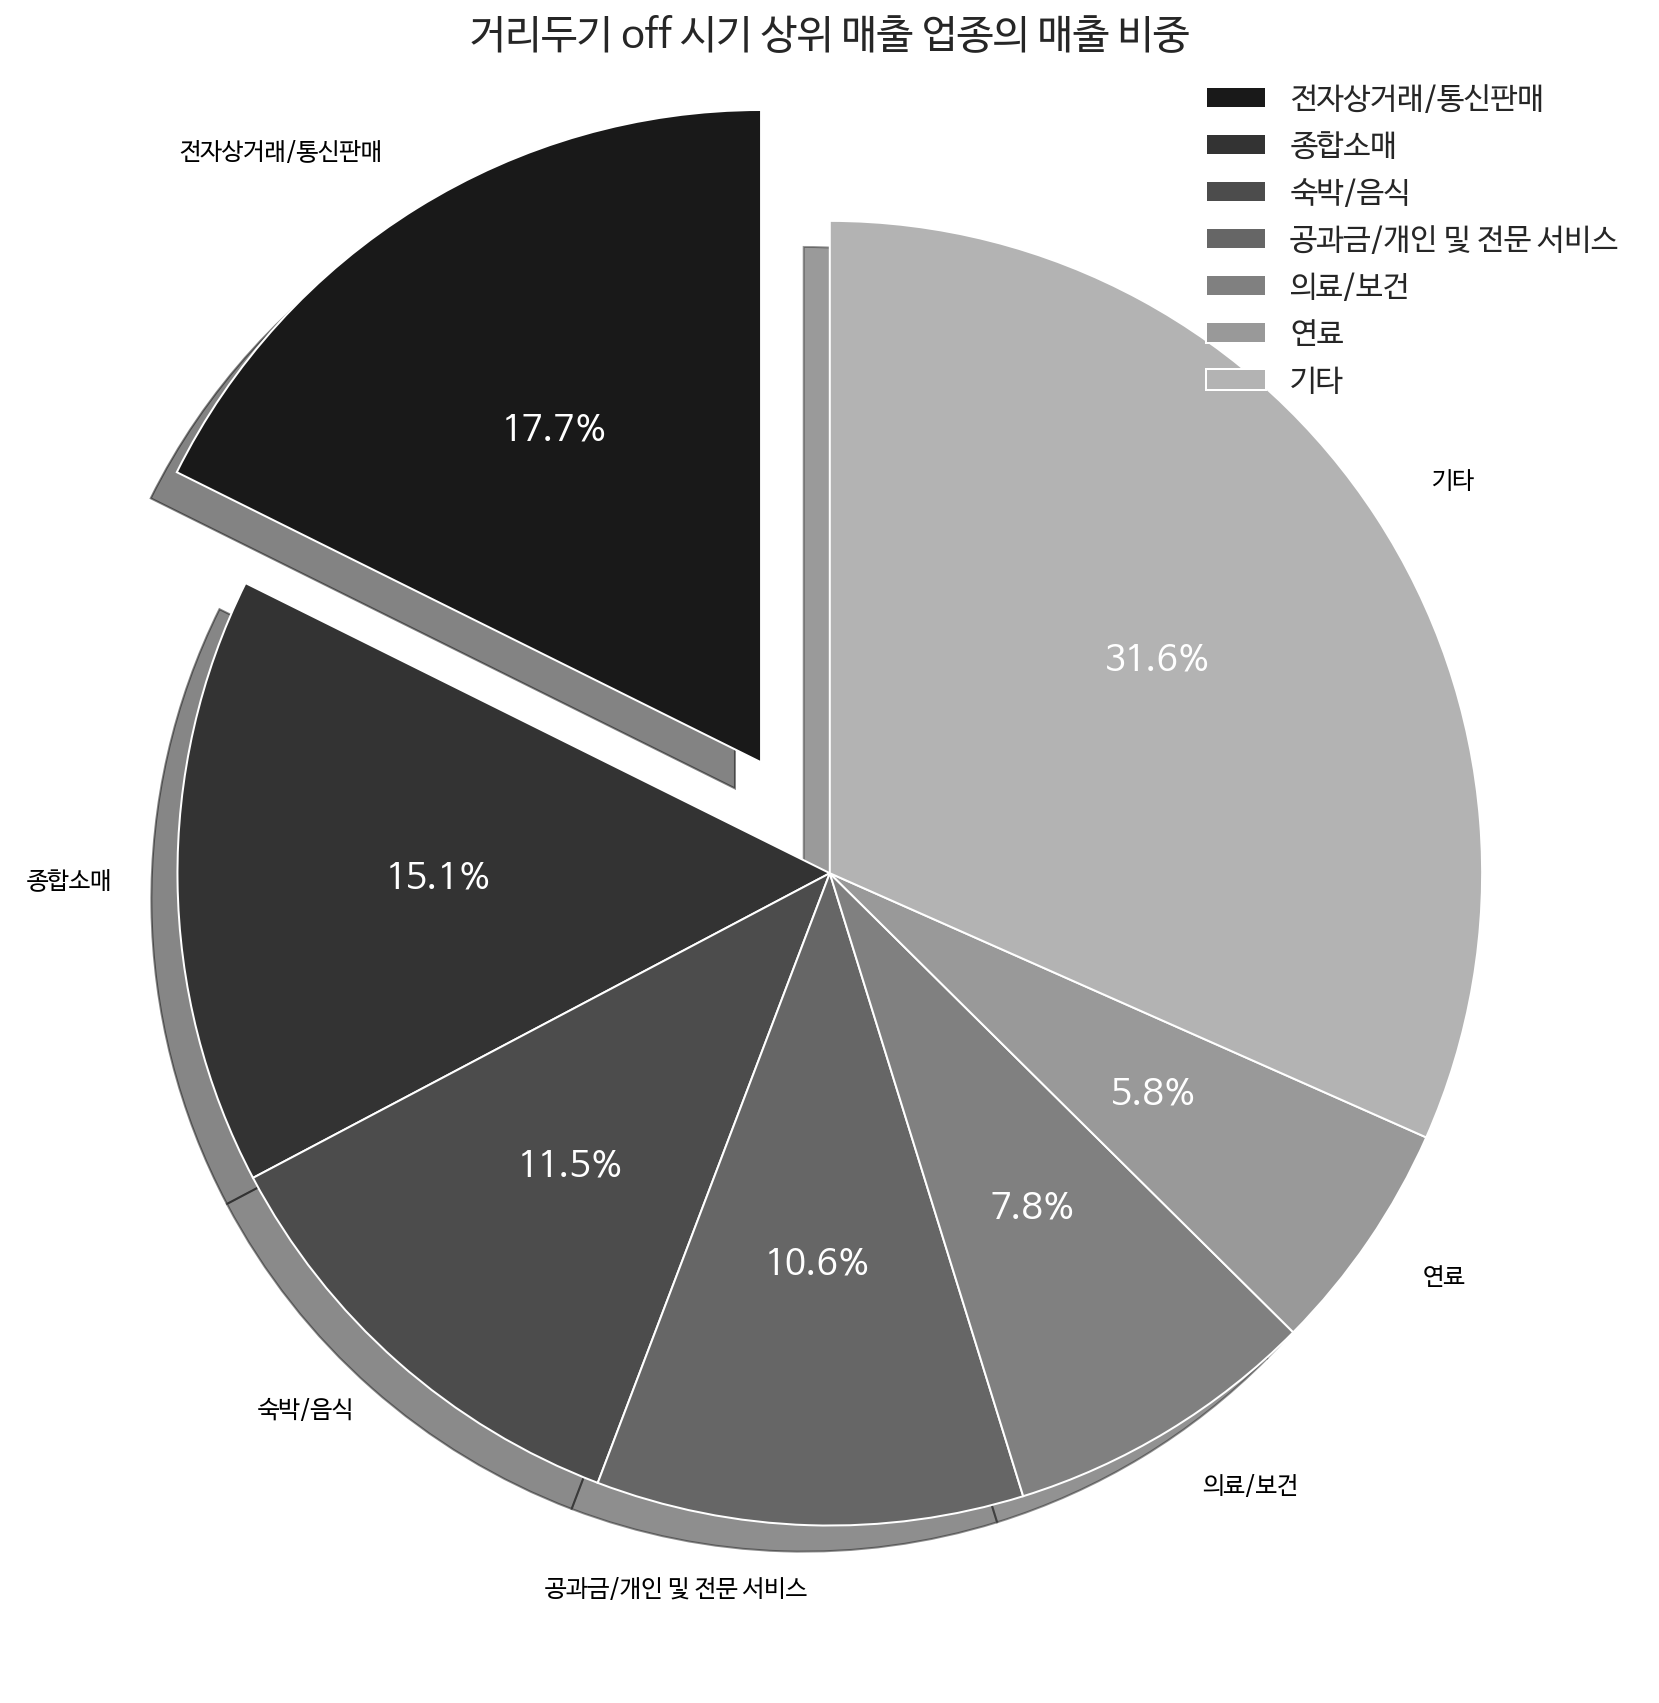

In [ ]:
# 파이차트 - off 비중


plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(15, 15))

colors = sns.color_palette("binary_r",9)

fake_labels=['A','B','C','D','E','F','G']
labels = list(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[[0,1,2,3,4,6],5].index[:])
labels.append('기타')

sizes = list(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[[0,1,2,3,4,6],5])
sizes.append(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[7:,5].sum() + 7.5)  # 나머지 업종들을 다 '기타' 업종으로 묶어서 처리


explode = (0.2, 0, 0, 0, 0, 0, 0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=90
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(18)
  t.set_color('white')
  
plt.title("거리두기 off 시기 상위 매출 업종의 매출 비중", fontsize = 20)
#plt.legend(labels)
plt.legend(labels,loc='upper right', frameon=False, fontsize = 15)
plt.show()


### 데이터 정제2

In [ ]:
# 테스트(off) - 업종들 합계
d = df3.loc[:,df3.columns[:] <= '2020/02']
d.iloc[:-1,:].sum()

2019/01    144955065
2019/02    139006309
2019/03    143538312
2019/04    145304127
2019/05    148739586
2019/06    145315148
2019/07    149069744
2019/08    146048560
2019/09    146404888
2019/10    150319658
2019/11    155810300
2019/12    156153453
2020/01    152688839
2020/02    142296862
dtype: int64

In [ ]:
# 테스트(off) - 업종명= 합계 데이터
d.iloc[-1,:]

2019/01    144955073
2019/02    139006312
2019/03    143538310
2019/04    145304111
2019/05    148739569
2019/06    145315149
2019/07    149069740
2019/08    146048559
2019/09    146404890
2019/10    150319666
2019/11    155810305
2019/12    156153444
2020/01    152688838
2020/02    142296865
Name: 합계, dtype: int64

In [ ]:
# 테스트(off) - 오차 구하기
d.iloc[-1,:] - d.iloc[:-1,:].sum()

2019/01     8
2019/02     3
2019/03    -2
2019/04   -16
2019/05   -17
2019/06     1
2019/07    -4
2019/08    -1
2019/09     2
2019/10     8
2019/11     5
2019/12    -9
2020/01    -1
2020/02     3
dtype: int64

**업종명 == 합계 데이터와 업종들 다 더한 합계사이에 오차가 조금 있긴하다. 오차때문에 업종별 비중 구했을때 비중들 다 합쳐서 100 이 안될수있음.**

In [ ]:
# 테스트(off) - 업종별 평균 구하고 비중 구하기
f = d.T.reset_index()
f.rename(columns={'index' : '월별'}, inplace = True)
f

업종명,월별,가구,가전제품/정보통신기기,건강보조식품,국산자동차신품,기타운송수단,대중교통,대형마트/유통전문점,면세점,백화점,...,편의점,항공사,화장품,공과금/개인 및 전문 서비스,교육,금융/보험,기타,연료,전자상거래/통신판매,합계
0,2019/01,598653,3475161,263484,4594181,369603,1841310,8569931,585499,4064143,...,2134543,1625665,791025,17150880,3672663,5592515,10600198,8087264,24501405,144955073
1,2019/02,634810,3521988,250164,4651512,392518,1813474,8581092,583068,4089589,...,2102293,1514222,751957,13514761,3837840,5733950,10467748,7916788,23824709,139006312
2,2019/03,662397,3951408,207914,5627463,482674,1765686,8418190,573511,4359605,...,2220576,1430567,812648,13080411,3873995,5902127,10596874,8144693,24973727,143538310
3,2019/04,613004,3614497,213875,5623788,437399,2001992,8504312,614716,4265331,...,2361400,1486605,795561,14797121,3306508,5916933,10676618,8349660,24986644,145304111
4,2019/05,566874,4039981,251712,5199793,465511,1968080,9001886,607942,4485542,...,2496561,1444001,807843,14108114,3659837,5898990,11096821,8762202,25216343,148739569
5,2019/06,584067,3516193,219547,4752236,479480,1930642,9256062,648820,4056864,...,2586093,1397494,803007,14666556,3662348,5889770,10814642,8612833,24283869,145315149
6,2019/07,573042,3664012,205391,4792403,441157,2003860,9348305,694720,3922704,...,2647432,1521309,745480,17919163,3742904,6138327,10698131,8279829,25280610,149069740
7,2019/08,594160,3548703,216467,4545536,436626,2128695,9374193,666525,3734012,...,2641312,1166353,751974,14354878,4066497,5943741,10946263,8867016,24387161,146048559
8,2019/09,594562,3171104,305907,4545567,403955,1877107,10335012,669761,4493255,...,2618596,1123384,717121,16007496,3551480,5982894,10978609,8351652,25394919,146404890
9,2019/10,627798,3169601,233633,5125729,422865,2037584,9126357,514360,4572780,...,2592692,1289106,761075,16485820,3484900,6203511,11176777,8655998,26426145,150319666


In [ ]:
#  테스트(off) - 업종별 평균 구하기
g = f.iloc[:,1:].mean()
g

업종명
  　가구              6.019213e+05
  　가전제품/정보통신기기     3.521043e+06
  　건강보조식품          2.371967e+05
  　국산자동차신품         4.949734e+06
  　기타운송수단          4.242436e+05
  　대중교통            1.944222e+06
  　대형마트/유통전문점      9.146915e+06
  　면세점             5.664122e+05
  　백화점             4.229288e+06
  　복식잡화            3.153743e+05
  　서적/문구           9.429070e+05
  　숙박              8.464752e+05
  　슈퍼마켓            5.837115e+06
  　스포츠/오락/여가       3.394334e+06
  　시계/귀금속/안경       6.683826e+05
  　여행사/자동차임대       3.952684e+05
  　음식점             1.611037e+07
  　의복/직물           1.986481e+06
  　일반병의원/기타의료기관    9.113276e+06
  　일반식료품           2.346578e+06
  　자동차 부품 및 정비     2.224055e+06
  　종합병원            2.353207e+06
  　편의점             2.429063e+06
  　항공사             1.308993e+06
  　화장품             7.662434e+05
공과금/개인 및 전문 서비스    1.558394e+07
교육                 3.665948e+06
금융/보험              6.051135e+06
기타                 1.099224e+07
연료                 8.518386e+06
전자상거래/통신판매         2.607574e+07
합계  

In [ ]:
#  테스트(off) -  큰업종 = 세분화 카테고리인 '전자상거래/통신판매' 평균을 기준으로 평균 잘 구해졌나 확인하기
df2mean_onoff.iloc[1,0] == int(f.iloc[:,1:].mean()['전자상거래/통신판매'])

True

In [ ]:
# 테스트(off) - off 비중 구하기
j = g.reset_index().rename(columns={ 0 :' off 평균'})
j['off 비중'] = j.iloc[:,1] / j.iloc[-1,1] *100
j['off 비중'] = np.round(j['off 비중'],1)
j

,업종명,0ff 평균,off 비중
0,가구,6.019213e+05,0.4
1,가전제품/정보통신기기,3.521043e+06,2.4
2,건강보조식품,2.371967e+05,0.2
3,국산자동차신품,4.949734e+06,3.4
4,기타운송수단,4.242436e+05,0.3
5,대중교통,1.944222e+06,1.3
6,대형마트/유통전문점,9.146915e+06,6.2
7,면세점,5.664122e+05,0.4
8,백화점,4.229288e+06,2.9
9,복식잡화,3.153743e+05,0.2


In [ ]:
# 테스트(off) - 비중 잘 구해졌나 확인하기
j.iloc[:-1,2].sum() == j.iloc[-1,2]

False

In [ ]:
j.iloc[:-1,2].sum()

100.3

**아까 위에 써놨던대로 합계 오차때문에 100 조금 넘게 나오는듯함.**

In [ ]:
# 도넛차트로 상위 6개의 세분화된 업종들 바깥에 표시해주기
#데이터 정제
df3 = credit_df.groupby('업종명').sum()
df3 = df3.T.reset_index()
df3.rename(columns={'index' : '월별'}, inplace = True)

# off 시기
df3_off = df3[df3['월별'] <= '2020/02']
df3mean_onoff = df3_off.iloc[:,1:].mean().reset_index().rename(columns={ 0 :' off 평균'})

#on 시기
df3_on = df3[df3['월별'] > '2020/02']
df3mean_onoff['on 평균'] = list(df3_on.iloc[:,1:].mean())

# off 비중
df3mean_onoff['off 비중'] = df3mean_onoff.iloc[:,1] / df3mean_onoff.iloc[-1,1] *100
df3mean_onoff['off 비중'] = np.round(df3mean_onoff['off 비중'],1)

#on 비중
df3mean_onoff['on 비중'] = df3mean_onoff.iloc[:,2] / df3mean_onoff.iloc[-1,2] *100
df3mean_onoff['on 비중'] = np.round(df3mean_onoff['on 비중'],1)

# off -> on 비중변화비
df3mean_onoff['off->on 비중변화비'] = df3mean_onoff['on 비중'] / df3mean_onoff['off 비중']
df3mean_onoff['off->on 비중변화비'] = np.round(df3mean_onoff['off->on 비중변화비'],2)

df3mean_onoff

,업종명,off 평균,on 평균,off 비중,on 비중,off->on 비중변화비
0,가구,6.019213e+05,6.273387e+05,0.4,0.4,1.00
1,가전제품/정보통신기기,3.521043e+06,3.752342e+06,2.4,2.3,0.96
2,건강보조식품,2.371967e+05,2.193429e+05,0.2,0.1,0.50
3,국산자동차신품,4.949734e+06,6.620627e+06,3.4,4.1,1.21
4,기타운송수단,4.242436e+05,5.346731e+05,0.3,0.3,1.00
5,대중교통,1.944222e+06,1.498433e+06,1.3,0.9,0.69
6,대형마트/유통전문점,9.146915e+06,9.611711e+06,6.2,6.0,0.97
7,면세점,5.664122e+05,1.394490e+05,0.4,0.1,0.25
8,백화점,4.229288e+06,4.396569e+06,2.9,2.8,0.97
9,복식잡화,3.153743e+05,2.921812e+05,0.2,0.2,1.00


### 시각화2 (여기부터 작업하면됨~~)

In [ ]:
# # 기타, 합계는 제외 -> 시계열의 참 값이 모호합니다 라고 뜸.... 수정해야됨.
# #해결방법 1. for 문 돌려서 업종명 하나씩 넣어주면서 안에 if 써서 기타 일때랑 합계일때는 리스트에 안넣는다 해서 풀던

# #해결방법 2. 걍 두번으로 나눠서 처리하던
# # f = df3mean_onoff['업종명'] != '기타'
# # d = f['업종명'] != '합계'

# df3mean_onoff['업종명'] != '기타' and df3mean_onoff['업종명'] != '합계'
# # df3mean_onoff['업종명']== '합계'

ValueError: ignored

In [ ]:
df3mean_onoff.loc[:,'off 비중'].sort_values(ascending=False) # 걍 한번 본거. off 비중 순위 보려고

31    100.0
30     17.7
16     10.9
25     10.6
28      7.5
6       6.2
18      6.2
29      5.8
27      4.1
12      4.0
3       3.4
8       2.9
26      2.5
1       2.4
13      2.3
19      1.6
22      1.6
21      1.6
20      1.5
17      1.3
5       1.3
23      0.9
11      0.6
10      0.6
14      0.5
24      0.5
7       0.4
0       0.4
4       0.3
15      0.3
9       0.2
2       0.2
Name: off 비중, dtype: float64

In [ ]:
# # bar 그래프로 off 비중, on 비중 비교할꺼임. 기타, 합계는 제외하고 할꺼
# x_label = []
# x = np.arange(len(x_label))

# y_1 = df3mean_onoff.loc[:,['업종명','off 비중']].sort_values(by = 'off 비중' , ascending=False)
# y_2 = [ 85,     75,     91,     43,       77,     70   ]

# # 넓이 지정
# width = 0.35

# # subplots 생성
# fig, axes = plt.subplots() # 매개 변수가 아무것도 없으면 1x1 배열이 등장.
# fig.set_size_inches((20, 10))

# # x에 표시할 데이터, y에 표시할 데이터, 전체 bar의 가로길이
# axes.bar(x - width/2, y_1, width, align='center', alpha=0.5)
# axes.bar(x + width/2, y_2, width, align='center', alpha=0.8)

# # xticks 설정
# plt.xticks(x)
# axes.set_xticklabels(x_label)

# plt.ylabel("")
# plt.xlabel("")

# plt.legend([""])

# plt.show()

## 테스트용

**업종별로 합치려고 for 문에 지역명 넣어서 돌리면서 행인덱스 리셋후 같은 행번호에 있는 업종들  
(정렬 안하면 리셋 인덱스 했을때 같은 위치에 같은 업종명이 들어가있음)  
sum 구해서 하나의 업종으로 합치려고 했는데 아무리 for문 돌려도 답이 업길래  
그룹핑 느낌으로 업종명끼리 묶어서 처리하고있는중. -> set_index 썻더니 업종명끼리 묶으려면 업종명으로 정렬이 되있어야 묶여서 정렬 먼저하고 묶었음**

In [ ]:
# # 지역 갯수 : 17개, 지역이름으로 리스트 만들기
# df2_data = list(df2['지역'].unique())
# df2_data

In [ ]:
# # 월별 리스트
# m = []

# for i in df2.iloc[:,2:]:
#   m.append(i)
# m

In [ ]:
# #테스트 -> 문제점: 딕셔너리에 지역, 업종명이 안담아진다..
# data = {
#       '지역' : ,
#       '업종명' : '종합소매'
      
#   }
# data2 = {c : d for c,d in zip(m, df2_sum1)}
# data2.

In [ ]:
# #테스트2 = > dict.fromkeys() 이용하기
# # 월별 리스트 -> m 에 지역 업종 추가해서 저장
# # 종합소매 월별 합 리스트 - > df2_sum1

# m.append(['지역','업종명'])
# df2_sum1.append([a])
# df2_sum1.append('종합소매')

# data = dict.fromkeys( m ,df2_sum1)

In [ ]:
# df2_sum1 = df2_sum.iloc[0:5,2:].sum()

In [ ]:
# #df2_sum1 = df2_sum1.to_frame()
# df2_sum1.set_index('0', drop=True,inplace=True)

In [ ]:
# df2_sum1

In [ ]:
# df2.iloc[0:5,1]

In [ ]:

# for a in df2_data:
#   mask = df2['지역'] == a
#   df2_sum = df2[mask].reset_index(drop=True) # 행 인덱스 재 지정 
#   df2_sum1 = df2_sum.iloc[0:5,2:].sum()
  
#   data={
#       '지역' : [a],
#       '업종명' : '종합소매'
#   }
#   # data.update(zip(m,df2_sum1))
  
#   # for b in df2.iloc[0:5,1]:
#   #   mask2 = df2['업종명'] == b
#   # m.append(['지역','업종명'])
#   # df2_sum1.append([[a], '종합소매'])
#   # #    = df2[mask2].drop()
#   # for b in range(17):
#   #   ##data = ({c : d for c,d in zip(m,df2_sum1)})
#   #   data
#   f = pd.DataFrame(data)
#   print(f)
#   pd.concat([df2_sum1,f], axis = 0)


In [ ]:
# # 지역별로(17번) for 문 돌면서 종합소매에 해당하는 (백화점, 대형마트/ 유통전문점, 슈퍼마켓, 편의점, 면세점) 얘네 추출후
# # sum  구한다음 종합소매 라는 새로운 컬럼 생성

# #종합소매 데이터프레임 만들기

# #지역명 담을 리스트 만들어준다
# merge_df = {'월별' : m , '지역' : 0 , '종합소매' : 0 }
# merge_df = pd.DataFrame

# for a in df2_data:
#   mask = df2['지역'] == a
#   df2_sum = df2[mask].reset_index(drop=True) # 행 인덱스 재 지정 
#   df2_sum1 = df2_sum.iloc[0:5,2:].sum()
  
#   data = {
#       '월별' : m,
#       '지역' : [a] * 37,
#       '종합소매': list(df2_sum1)
#   }

#   f = pd.DataFrame(data)
#   merge_df = pd.merge(merge_df,f, on='월별' , how='inner' )

# merge_df

In [ ]:
# df2['업종명'] 

In [ ]:
# df3 = df2['지역'] == '부산'
# df2[df3].reset_index(drop=True)

In [ ]:
# 거리두기 on 기간의 업종별 소비량 시각화

**데이터 다듬을때 월별이 행쪽으로 갔으면 싶어서 시도해봤던건데 실패함**

In [ ]:
# 행와 열 위치 바꾸기 (보기 편하게)
#업종명이 컬럼으로
# industry_df = credit_df.set_index('업종명').T
# industry_df.head()

In [ ]:
# mask = credit_df['지역'] == '서울'
# credit_df[mask]

In [ ]:
#지역명이 컬럼으로
# city_df = credit_df.groupby('지역')[['업종명']]
# city_df.head()

In [ ]:
# credit_df.groupby('지역')['2019/01'].sum()

In [ ]:
# # 전체적인 소비 증가율 (거리두기 on + off 전부 합쳐서)
# import numpy as np
# pd.pivot_table(
#     credit_df,
#     index = '업종명',
#     columns = '지역',
#     values='2019/01'
# )

In [ ]:
# credit_df.shape